##Install packages and import libraries

In [ ]:
!sudo apt install tesseract-ocr
!apt-get install poppler-utils 
!pip install pytesseract
!sudo apt-get install tesseract-ocr-mon
!pip install pdf2image
!pip install anvil-uplink
!pip install beautifulsoup4

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 c

In [ ]:
import os
import PIL
import random
import pdf2image
import pandas as pd
import pytesseract
import tempfile
import cv2
import os
from google.colab.patches import cv2_imshow
try:
  from PIL import Image
except ImportError:
  import Image

Text extractor method, uses a temporary path to convert PDF file to image, then iterates over said images from the temporary path, enhancing each image using cv2 and finally uses tesseract to extract text. Outputs a list.

In [ ]:
def text_extract(path_to_pdf):
  #Define data
  pdf_file = path_to_pdf
  out_pdf = []

  #Create temp directory to store png files
  with tempfile.TemporaryDirectory() as path:
      images_from_path = pdf2image.convert_from_path(pdf_file, output_folder=path, fmt='png')
      names = os.listdir(path)
      path_dir = []

      #Loop over each temporary directory items using their names
      for i in names:
        names_path = path+'/'+i
        path_dir.append(names_path)
      for i in path_dir:
        img = cv2.imread(i)
        img = cv2.resize(img, (0, 0), fx=2, fy=2)
        gry = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        erd = cv2.erode(gry, None, iterations=1)
        thr = cv2.threshold(erd, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
      #Extract text
        txt = pytesseract.image_to_string(thr, config="--psm 6")
        out_pdf.append(txt)
  return out_pdf

Extract text from PDF.

In [ ]:
path_to_pdf = "/content/5.pdf"
pile = text_extract(path_to_pdf)
pile

['International Journal of Humanities and Social Science C—‘CSCSCSCSC‘V od. 3. No. 5; March 20113\n\n4, Conclusion\n\nStories are used to present different contents from life. We can retell something from the everyday life, ancient\n\nhistory, or even something that never happened (PeleS’ & Marotti, 1999). Written analyses of literary\n\nrepresentation of sport of the past, in our case of wrestling, are demanding and very complex tasks. First of all,\n\nthey require finding translations of the original literary works. The complexity of history and ancient literary texts\n\nrequire from the writer to contextualize and recontextualize the period in which they were written. Yet for all\n\nthese challenges, examination of literary representation of wrestling was worthwhile because it provided us\n\ninsight into the ways which literature and sport were always connected, presented, and transmitted. By reading the\n\nabovementioned literary works in the present we are able to understand bette

In [ ]:
pile = ("""Interview Texts for Analysis
Interviews
Interview With ‘Mogi’ and ‘Minga’
Mogi: “My brothers were all wrestlers, and they had all of their medals up on the wall. As a kid, I would put them on, and I wanted medals of my own. When I was in fifth grade, 1999 or 1998, my brother took me to a wrestling club, and I saw the kids doing rolls and exercise on their head and I went home and tried it on the carpet. For some reason, it was a year until I got to go. So, I think it grew on me. I was super motivated. I joined in September, and in February had my first small district tournament. I weighed 29 kg. I won third place. In May, I went to a tournament and won second place. When I was training, I was thinking there was another kid in Japan or someplace training harder than me. I was motivating myself to beat my imaginary opponent. I was very thin, physically weak, and often sick as a kid. But I was also very fast and agile. In addition to wrestling, I also played basketball. I was on the team even though I was the smallest. So I was doing two trainings a day, basketball and wrestling.” 
Minga: “My uncle, Bumbayar, is a good national wrestler, a seven-round winner in Naadam, so he got the title of elephant. He was the inspiration for me when I was a kid. As a family we would get together and watch his tournaments and I wanted to be like him. I had two brothers, and I would wrestle with them and with my cousins. I grew up in Uvs Province where the best wrestlers come from. I am from Tes soum which is probably the most wrestling-dominant soum in the country. Since Naadam records have been kept, Tes has won 44 times, the second highest soum winning just nine. Everybody wrestled there. If you go there and just grab someone off the street, they will wrestle you.” 
Minga: “In 1997, our family moved to Ulaanbaatar for education. I was in third grade. I joined a wrestling club for a year, but the coach was sent to Japan for school. During that year I won some medals and it was a nice feeling, but then I had no place to train until Arslan Club was formed. They had a big tryout, where we had to do pushups, sit-ups, running, and pullups to compete for a space on the team. I got in. John and Ben Peterson, world title winners and Olympic gold medalists from the 1970s, organized this cadet international tournament, in the 1990s, which ran until a few years ago, called Athletes in Action. Me and Mogi competed and made it to the finals. I think Mogi won. We were about 12 years old, and Mogi went to Russia for the finals. Mogi also won an international tournament in Bulgaria when he was about 14. “
Minga: “Our club had an invitational tournament with over 400 cadet kids competing in eight or ten weight classes. The Peterson tournaments were huge, he brought kids from the United States and athletes, cadets from Inner Mongolia and Russia. Bishop Lynch, from Texas, coached by Kenny Munday. Luke Silver Ashmore’s brothers all went to division one schools with a scholarship. They all came to Mongolia to wrestle in this tournament. These tournaments were international freestyle, but in the US, you have to learn folkstyle or scholastic-style wrestling. It is a bit different, and the scoring is different, but at the end of the day it was all wrestling.” 
Minga: “Our coach had started a club where we wrestled. World Cup top-ten teams did dual matches against each other, and in 2003, it took place in Madison Square Garden, New York City. We went to compete, and our coach was part of the staff for the event. The Mongolian national team was hosted by Mike Dipiano Sr., athletic director of St. Benedict’s in New Jersey, and Mike Dipiano Jr. was the head of wrestling. They hosted our team, and we went over to St. Benedict’s to train. Our coach made friends with the American coaches. The American coach said ‘If you want to send a kid to US to wrestle and study, we would take one.’ Mogi was chosen, and started in the spring semester, January 2004. He was 13 years old, alone in New Jersey. His English was better than mine. I knew English from school, but I didn’t really speak it.”  
Mogi: “One of our older teammates was on the international team, and they messed up the workout slot times at Madison Square Garden so we didn’t have a slot. So someone arranged for us to train in New Jersey and that is how we wound up at St. Dominic’s Prep, by accident. It was my first time staying away from home. I did well in school. But I had no friends and I didn’t know anyone.” 
Minga: “Mogi came back that summer and I was offered a chance to go back to school with him. I started September 2004 as a junior with Mogi, and Bagana came in August 2005 as a sophomore.” 
Mogi: “That year, I became All-American. I was a three-time high school All-American and Minga was a two-times All-American. Minga’s record was 49 and 2 in senior year, but in junior year, he lost a lot of matches because he didn’t know how to escape from bottom which is required in folkstyle wrestling, but not freestyle. In freestyle you just stay down and wait for the ref to do a reset. In the US, they have both international and American rules.” 
Minga: “The biggest wrestling tournament in the world is Fargo, North Dakota, cadet national championships, with 30 mats and three days. And that one is [international] freestyle. [After Fargo] they collect the best wrestlers from US and form a dream team. Mogi got picked for that, and then they went to go wrestle against all of the state teams.” 
Together, the two wrestlers amassed only three losses in their final year of high school with a record final year 59 and 2 and 49 and 1 respectively. Mogi finished high school with a record of 118-21, for grades ten to twelve.
One difference between wrestling in the United States and Mongolia identified by all of the interview subjects was that in the US they had the opportunity to compete more frequently. Minga wrestled in American high school for two years and had over 100 matches. He said: “If we had stayed in Mongolia we couldn’t have done that. There are only five or six tournaments per year and no dual matches.”
Mogi: “[In Mongolia] there is no matching system, just a lottery. When you weigh-in, you draw a number, and you could get matched with anyone, the best guy or worst guy.” 
Minga: “I think our background influences everything we do, whether it’s judo or wrestling or boxing. But a big part of our culture is wrestling. We are known as a wrestling nation. Our national sport is wrestling. We go on the grass and wrestle for the take down, and it is a unique sport on its own, unique agility types of technique.” 
Minga: “There are little guys winning against these huge guys. They know how to execute the techniques and how to train. There are a lot of techniques that we grew up with like trips and knee taps that I used in my freestyle. These are unique techniques that people don’t know in other sports or freestyle, and they can’t see it coming. A lot of the techniques that I hit these kids with, I was confident that I could score with it, but they couldn’t see it coming. Mongolian wrestling is so unique. Good wrestlers come from other countries and can’t win in it. No chance.” 
Minga: “I grew up in a place where you have no choice but to learn wrestling. You go out riding your horse or herding sheep. You wrestle the other boy who is herding his sheep. Or we do horse racing.”
Minga: “We were both All-Americans, and universities were showing interest in us. High school season ends in February. The college championship was in March, and it was held in New Jersey. The team from St. John’s University came to train at our school, St Benedict’s Prep. They only had five guys, so they had an odd man, so they asked me to join in and help him train. I wrestled him and I scored on him, and the coach was impressed. And the same happened for Mogi. The coach asked us where we were from and so on. Our headmaster graduated from St. John’s University, and that’s why they were there. Both are Benedictine schools. St. John’s coach, Brandon Novack, said: ‘After I go back, I will send you an application and let’s see what we can do.’ When we had first arrived at St. Benedict’s the wrestling coach asked us if we wanted to go to college. We said we planned to. He said, ‘If you do everything I say, you’ll make it.’ Coach Novack sent us the application. That part was easy. We had very good grades, because in Mongolia, science, math, and physics were ahead of what we learned in the US. We were mediocre in History and English, but our overall GPA was good. Now the problem was the scholarship. Division 3 didn’t offer scholarships. But Coach Novack wanted to help us, and we had no other options. We told him, ‘Even if we had to pay $5,000 a year, we can’t do it.’ So, they gave us 20% university scholarship for being Mongolian and 30% for good grades and then some private donors got together and paid the remaining 50%. We didn’t even make a trip or make a visit to see the campus. We just went back to Mongolia for the summer and started school in September in St. John’s. And we were lucky. Out-of-state tuition should be double and foreign should be triple.”

Mogi wrestling for St. John’s University

Minga wrestling for St. John’s University
Mogi: “We used to have the Russian school system which was 10 years. and Minga might be the last year before they changed to 11, and then quickly to 12 years. That meant, we were already high school graduates in Mongolia, including math and science... English and History ate up most of my study time, because I had to translate everything. I had a huge Mongolian-English dictionary, and had to use it so many times that, by the end of the year, the right bottom corner was missing. You couldn’t just go out and buy one of those in New Jersey. It was the one thing I brought from Mongolia. My suitcase was empty except for the dictionary. The teachers allowed us to use the dictionary in school and exams.”
Minga: “We made friends with the wresting team so quickly. The wrestling family made our stay so much better. My English was not as good as Mogi’s, but he was right by my side. He helped me communicate with people and have a good conversation, at a friends’ level. When we wrestled, that was ok, our teammates used to take us home to stay with their families, and go to the mall and shopping. Our coaches would also sometimes take us home. St. Benedict’s has a dorm with capacity for 60 kids. They have house parents who work and live in the dormitory, to take care of the kids. And the monks would come from the monastery to help us with our homework and with our tutoring. If you wanted to succeed, the support was there for you. You just had to put in the effort. The teachers were understanding too. Sometimes they would say ‘fifty pages for everyone’ but only ten for me. It would take the American students an hour, but for me it might take three or four. Eventually, though, they had me on the same level as them.” 
Mogi: “Catholic education is great. The best thing was the students run everything. Student workers ran the library cafeteria… St. Benedict’s is a different type of set-up. It’s even different from other Catholic schools. It is becoming a model and was featured on TV. It focuses on athletics, leadership, and academics. It was very strict in the way that they beat the culture in, all about brotherhood and community building. Community building was so important for the school. To stop racism, the school focused a lot on black children. It was a special school, very strict. You had to play two sports per year, spring and fall. We wrestled and the other season we did cross-country, because we wanted to do something that would help us with wrestling. You had to wear a tie and shoes. You would be sent back home if you didn’t have your tie. Admissions were mostly need-based and run by the donors and alumni. The school won seven out of ten national championships. Lots of our classmates went on to play college sports or pro sports. They produced basketball, soccer, and wrestling stars. The school is famous for basketball. They have a lot of brotherhood and leadership and hiking in the mountains and staying overnight in the woods.”
Mogi: “I think this plan should be implemented everywhere in the world, especially the rich schools here in Mongolia. I went back as a science and math teacher after I graduated college. It made us so busy and we were dealing with cultural difference, but now we both speak great English because we had to do activities and sports and all of that. I tell Mongolian young people who are going overseas to join clubs, it is quicker to get access to the community and friends. The headmaster told us that success is when preparation meets opportunity. That was us. We had the wrestling and academic skills then we met the opportunity, and we were ready for it. Going to college was the dream, and we made it. In college we had no problem with reading. And we were like halfway cultured.” 
Minga: “My mom called one time and asked if I was missing home. I said ‘I am home. I’m in USA.’ That’s how quickly you adapt as a kid, sucking it in like a sponge. When we moved from high school to college I had to lift more weights, but Mogi didn’t. He was very technical. He had the record for the most wins as a freshman. Going to big tournaments as a freshman, I was still a kid, but the guys were grown men. That’s why I started lifting weights and drinking protein.” 
Mogi majored in physics. Minga majored in math and minored in business.
Minga: “Junior year was hard. The upper-level classes were a lot harder. In years 1 and 2, you just had to sit down in the evening and do your work. In years 3 and 4, you needed some tutoring and math club. In lower divisions, there were numbers in math class. In years 3 and 4, there were no numbers. Our original goal was to get educated. So we asked ‘What’s the hardest major?’ and they said ‘Computer Science.’ And they asked me to write a program, but I didn’t know what that was.” 
Minga: “I think wrestlers tend to be more academic and take harder majors, but in division one they take physical education or nutrition and only 12 credits per semester and go to school in summer.” 
Mogi graduated St. John’s in 2010, returning to Mongolia with a bachelor’s degree. Minga graduated in 2011 with a collegiate record of 88-19, winning the national championships three times. In his senior season, he went 27-1, earning him the NCAA Championships’ Outstanding Wrestler Award and the D3wrestle.com National Wrestler of the Year Award. After returning to Mongolia, he finished first at the Tulgat Open in 2011 and second at the 2012 Mongolian Open. 
Both were All-Americans, Minga winning three All-Americans. In his final year of high school, Minga broke the school record by winning three national titles. Seven days after graduation, Minga was back in Mongolia. 
Minga: “I went back to Mongolia, got a job, but kept active training because it’d been part of my life since I was very young. I kept training at 66kg, working with the national team in Mongolia, but I could beat the [top three] guys easily. It was June, and I had just finished the season in March, so I was pretty sharp still. My coach just came back from Taiwan where he was head coach for two years and said ‘Next year is the Olympics,’ 2012, London. ‘What do you think?’ So I got thinking about that. We went to Turkey to watch the Olympic qualifiers, and I was training and helping guys cut weight. I got photos with Jordan Burroughs and some others. Then we had the Mongolia Open competition, and I made it to the finals, and lost to a Mongolian. The federation sent me to the Asian Championships. I made it to finals, and lost.” 
Minga did not make it to the Olympics, but he made it to the qualifiers.
Mogi: “Sports nutrition and professional resistance training specific to a sport is new to Mongolia. Oftentimes, teams that have more funding will be able to do something like that or pay for fitness gym memberships. However, the lifting is done usually under instruction of wrestling coaches. I’m not sure if it has changed or not since I’ve been away from freestyle wrestling, due to all the bullshit and in-fighting... The BJJ Association is much better in that sense, not fighting with each other. Few sports teams have a dedicated personal strength trainer due to lack of funds and lack of professionals capable of filling the role. Mongolian traditional wrestlers have massive thighs, but that’s not always true for freestyle, with the exception of heavier weights.” 
Mogi: “I don’t think any Mongolian would be able to just walk in and dominate a folkstyle tournament in the US, unless your freestyle is very good and you dominate from neutral position by multiple takedowns, which was my case in high school and also my weak spot because I never trained escaping. Had I learnt escaping in high school, my record would be much higher, and I’d have been a much tougher opponent. I was able to master the escaping from bottom in folkstyle in junior year in college because my teammate, who was a year older and weight class above me gave me hell on top and I was pissed off not being able to escape. I give credit to my teammates in college. Had I learnt how to escape, back in high school, and if I’d learnt how important it is to do strength training, my wrestling career would have been very different, winning the national prep would have been within reach, because I was very technical, but a weak wrestler.” 
Mogi: “One advantage I had over the American kids or college guys was being able to use my foot as part of my takedown in my pocket. Also, my confidence in wrestling from over and under position, which are common skills in Mongolian traditional wrestling and judo. Anyone who has a good freestyle wrestling background can be successful with some minor adjustments and escape technique in folkstyle.” 
Researcher: “That is exactly what I say when I wrestle here. In China, one of my best training mates was not from the wrestling team, he was from the judo team and now he is signed with UFC China. But he always did that foot sweep. Then I came to Mongolia and I see so many different kinds of foot sweeps. Western wrestlers, Americans, don’t usually know those techniques very well.” 
Researcher: “In Mongolia, I haven’t actually seen wrestlers or MMA fighters doing physical training. They do a long hard warm up, which includes exercises, but I haven’t seen them do weightlifting days or conditioning days. In fact, at one team, the coach asked me to take the guys on weightlifting. So, I was wondering, is the strength in the countryside just natural from hard work and eating meat and maybe the guys don’t do any strength training? And did that carry over to the city? I trained with the sambo team at the sports center, just one day, but they actually do weights like three to five times a week. Maybe the wrestlers at that level do the same. But the guys at the physical education college and at the high schools, I have not seen them lifting weights or doing conditioning.” 
Researcher: “I asked you about the national wrestling and if it thins out the talent for freestyle and it seems like you agree that at the high end, like 120 kg (264 lbs) and up, those guys are mostly doing national wrestling, not freestyle. Hakuho Sho’s father was a six-time Naadam winner and the first Olympic medalist from Mongolia, so clearly some people can do both. You said by doing national wrestling they get immediate recognition. That was the thing in India, too. They have 20 million wrestlers and almost no Olympic medals. Traditional wrestlers also make a lot of money and win pride, so they aren’t that interested in the Olympics.” 
Mogi: “There are wrestlers who do both, and some do only one or the other. Success in traditional wrestling can result in immediate reputation and improving livelihood, so a lot of the bigger guys focus their effort there. There are quite a few wrestlers who are successful in both and able to capitalize on skills from both styles of wrestling to their advantage, which makes them tougher to beat. However, our heavier freestyle guys are not the best in the world due to a lack of competitors in their weight class, for the reason I mentioned above. A lot of the athletes have a hard time transitioning to real life after their careers ends. I do believe that for one who successfully applies the wrestling mentality in business, success is a matter of time and patience.”

Interview With Mendbagana Tovuujav ‘Bagana’
In eighth grade, back in Mongolia, Mendbagana Tovuujav “Bagana” got into a street fight. Then two-time world freestyle wrestling finalist Naranbaatar Bayaraa approached him and invited him to wrestling training. Three of Bagana’s brothers and his father wrestled on Mongolia’s national team, so wrestling was already a feature in his family. Bagana took third place in the Mongolian High School Nationals. After training with the Mongolian wrestling team, Bagana was offered a full scholarship to finish high school in the United States. The coach of the Mongolian team had an agreement with St. Dominic’s High School, New Jersey, to send one Mongolian wrestler each year. That year it was Bagana. He wrestled at St. Dominic’s and earned a full scholarship to George Mason University. Bagana finished his senior year at university with a record of 20-3.
When he arrived in the United States, he spoke no English. He struggled with the language, but managed to succeed academically. In Mongolia, he had been doing international freestyle wrestling, but in the United States he had to learn folkstyle. He said that having had experience with several styles, including Bökh, gave him a different perspective. 
Bagana: “Comparing wrestling in the US and Mongolia, a huge differences is the facilities. Every high school, every school in the US, has a perfect gym, better than the Mongolian national team. In the US, at practice, they have Gatorade on the side and they don’t even finish drinking it. They just drink half and throw it away. In Mongolia, we drink Gatorade for Christmas. We don’t even have water in the training hall. No mouth guard, that’s for rich kids and weaklings. You don’t need teeth.” 
Bagana: “In Mongolia, we have some good coaches, but they don’t teach details. The best part of Mongolian coaches is that Mongolian coaches look at you, see you, and make you find yourself. But the majority of the American coaches I met, they teach you how to do, how to train it, ‘You touch this person. You do this. You stay in your box and you do this or that.’ They are very technical and teach you to do it the same way. They teach everyone to do it the same way. Even telling us, ‘When you do this move, your eyes should be looking this way or that way.’ Mongolian coaches let you be yourself. It’s more based on a feeling that you find yourself. It’s not like everything you have to do, you have to do perfectly. But, in America, they want you to stand here, stand that way, take a breath, head this way, finish like that…every detail they teach you. One hundred kids ‘Do this. Do that. Practice 50 times.’ And the kids do it.”
Bagana: “In a way, I think the Mongolian way is right. I think everyone is different. And there could be someone who is tall or skinny, and they do a single or double-leg-takedown differently, but still score. Or, kids with strong arms and a strong back do it differently, and still win. A short, fast guy is different. But if you have a coach who is too tall or long, his idea is different. What if a guy is tall, long, and not muscular, and that coach teaches him a high-crotch. If he teaches high-crotch with lift that has to be for the strong wrestlers. Each wrestler is different, and has to do the technique differently. Some people have good feeling, but need to know how to use their advantage to get the points. The beauty here, in Mongolia, is they make each athlete different.” 
Bagana: “In America, even the kids they like to talk, and describe detail by detail. But here, it is more natural. They just do it 2,000 or 3,000 times, and then they figure it out. If a person really wants to be a good athlete, an Olympic champion, he just has to figure it out.” 
Interview With Odgerel Batkhishig 
Odgerel Batkhishig, wrestling at Campbell University in North Carolina, talked about how transferable Mongolian techniques and wrestling training are for freestyle wrestling. He said that he felt that Mongolian Bökh wrestling, and growing up wrestling in Mongolia, was a huge advantage, but even boys with a solid Mongolian Bökh wrestling background would need to go to the United States young enough to receive training, in order to excel at folkstyle, scholastic-style, and international freestyle. 
Without being able to grip the clothing, a Mongolian kid trained only in Bökh would be at a disadvantage, he said. Also, he would not know how to fight on the ground or how to pin. He would also need to learn the rules and how to leverage them to win points in matches. This is why Mogi, Minga, and Bagana did so well in the United States. They went young enough to learn and excel at folkstyle wrestling, before competing for a spot on a university team and doing collegiate style wrestling. 
Odgerel Batkhishig at Northwest Kansas Tech finished 2016-17 with a 44-10 overall record. In 2017, he became a National Junior College Athletic Association (NJCAA) All-American, placing third nationally at heavyweight. At the Southern Conference Championship, he was named the 2018-19 runner-up at heavyweight. He also took runner-up at the Navy Classic. He claimed the 2018 NJCAA National Championship at 285 lbs (129 kg), as well as a second All-American honor, finishing with a two-season record of 86-13 record.
Interview with BatMunk Anthropological researcher 99131584
 Батмөнхийн Буяндэлгэр Buyandelger Batmunkh Doctor and researcher
Used to teach in national medial university his major was philosophy but he is also teaching history anthropology. Used to teach at the wrestling school
This school trains wrestling teachers and sports coaches. Until 2013 it was a university now it is a sports center for young kids. Now just wrestling freestyle traditional and judo no education.
I had seen the cave paintings online but didn’t recognize them. So he showed me ink blot enhancements of the carvings. 
This is from the  Del Mountain you see in the picture in the article. The archeologists put a layer of special material over it then paint over it so you can see it. 
Cave paintings are usually from a bird’s eye view. The point of view is from the sky. But how did ancient people know how to do that? 
Special attribute f Mongolian cave paintings all of them are usually from a birds eye perspective. There is a famous paint One Day in the City’s life which is similar to cave paintings taken from bird’s eye view. 
It looks like they are wearing Mongolian hats but actually it is because they used to bun up their hair. Some claim these are from 7,000 years ago. From bronz age 4-5000 more accurately. To show that they are males they have a penis although the people weren’t really naked it was just that this is how they showed that it was male.
They were wrestling in a circle with people standing around. 
Some photos look like the people are kicking but we cannot say for sure that this is what we are seeing. It could be a sweep or it could be something else. 
We know it is wrestling because they don’t have weapons but some people say it looks like boxing but there is no record of Mongolians having done boxing so long ago. Make private parts 3,000 years ago they couldn’t do them in beautiful detail. 
Some people think the pictures look like ritual dancing but the actual ritual dancing pictures are different. 
There are pictures with people standing but there must be an interpretation some say it is an audience but it may also be just the other villagers who were not wrestling. There were fingers. 
Umnogovy province and bayar ungee province in each province the paintings differ. Most of the Mongolian cave paintings are from bayar ungee. The world is not sure if it is wrestling or bokh wrestling. The short hair pictures are male the long hair are female. Small people could be children but could b adults far away as a perspective. 
In cave paintings if someone is wearing a hat then they are probably monks or important people. 
People are fighting with no weapons but not sure if the others are watching or maybe just there but possibly audience. 
Some of the paintings are dirt paintings with dirt painted on the rock and it is very dry in the desert so it survives a long time. But the carvings usually survive longer. Dirt paintings are easy to observe with your eye but with carvings you cannot really interpret them without training. 
Hunu period the hun period 2500 years ago and start to have bronze artwork on the belt buckle of the traditional Mongolian deel. They were wrestling in the image. They are waring animal fur, lang pants. Many vestiges of this civilization have been found in Mongolia. Between approximately 300 BC and 450 AD, there existed a nomadic group known as the Hunnu.
Antonio: How do Mongolians feel about their history being in museums in other countries? 
Him: Most of these artifacts were from a region which is China, Ordos, today so we still wouldn’t have access to this. 
In Mongolia there are people researching bokh but none of them are doing research so it costs a lot of money to go and retrieve these. Now we are building the Genghis museum and we are starting to repatriate these artifacts. 
Thy were wearing lather trousers possibly because of riding horses. They would roll them up and tie them up for wrestling. The heroic ballads of the time when they established the empires depict that they roll them up by coupling the heroic ballads with the artifacts and artwork found they can piece the history together.
Chinese era artwork showed wrestling which China claimed with shauijiao, they influenced each other. There is really no way to know from the pictures which one it is. One picture showed men wrestling with no shirt, only briefs inside a circle that was exactly like sumo and the Chinese call it shampoo which is the same as the word for sumo. Anthropologist said actually thy are not briefs. They are trousers which have been rolled up and the were gripping the trousers and wearing boots so it looked like Mongolian wrestling. In sumo the wrestlers are barefoot. 
The Sketh people migrated from Asia to Europe and this artwork showed Sketh people or the faces looked like that. The discovery was made in Ordos which is inner Mongolia and is a central point for discoveries from Asia from many cultures and this could be from many cultures. Maybe the wrestling was one kind which branched into many kinds. 
Kitan People the pictures looked more similar to Mongolian Bokh and they are waring short pants for the first time. And they are wearing a jacket which covers the whole upper body. The legend says that because of princess kuntalun they changed the jacket so no women could wrestle but he said it is just a myth. It is a fact that Mongolians used to war the full shirt but we do not know why they changed. 
There are no images or references to women wrestling throughout Mongolia’s history. Kitan 10-11th century. 
He doesn’t know where the vases are but there are images of them. In 1930s the Japanese did a lot of ethnographic research in Manchu guo including making films and photographing these vases. 
Mongolians used to go to Beijing to do research but the Japanese had their own education and training and equipment so they went into the field in Mongolia and northern China. in Mongolia archeology really only started in the 1950s in Mongolia and universities only started in the 1940s.
Today, Mongolians don’t need to go to China to study archeology. They can study in Mongolia and carry out research inside of Mongolia. 
Mongolians can dig things up but restoring it we have to Europe they have the technology. Some of the artifacts have disappeared and are believed to be in rich people’s houses. 
One of the pictures had the shorts and HUGE Mongolian thighs. Open chest. H even had cauliflower ears. He said ask a Chinese wrestler where this is from they will claim this is Chinese wrestling but it is clearly Mongolian because of the open chest, short briefs and the boots. At this point, boots are added that look much more like horse riding boots. This is the Kita period. 
In yuan empire times the kings palace had an establishment for wrestling and when diplomats came they would have wrestling demonstrations as entertainment.
This is the period yuan when the wrestling clothing begins to look like modern wrestling clothes. Before this they were wearing animal hide. Now yuan period start to have silk. 1368 Mongolians had a protest and yuan empire fell and Mongolian kings returned to Mongolia. And the capital came back to Karakorum
Fall of yuan Dynasty, People believe this is when Mongolian bokh came back to Mongolia and began to develop from there. 
In western Mongolia there were people wrestling short pants no shirt similar to freestyle and wrestled for the pin. So they have determined there are three styles of wrestling 
The anthropologist said there were three types of wrestling after the fall of Yuan when the Mongolian kings moved back to Mongolia. 
Nam (_________) One wears shorts like freestyle wrestling (some people still do this in Uvs and they call it___shallbor?___)
Hakh wrestling Mongolian main wrestling nation
Ulzin chin wrestling from inner Mongolia with long trousers.
In 1945 we stopped having independent Naadam.
In inner Mongolia in avsha province you can still find freestyle with only shorts tradition. Called _________.  In Inner Mongolia, several kinds of wrestling. 
In 1980, Mongolia changed it to war the same clothes and everyone wears the same clothes today and same rules. In Mongolia territory only one type of wrestling. 
Art work form 16th century looks like modern wrestling. The picture had color and the wrestlers were wearing blue and red. The picture looked like wrestling inside of the kings palace. We do not have written records with very detailed descriptions of the wrestling or what they wore, we know this mainly from art work. The writing only confirms that the wrestling existed. 
Early 20th century painting with the Bogd Khan full on Naadam. Some people have braids some have buns. The buns were the same as the cave paintings. They are doing the eagle dance and took off the hat to wrestle. In the audience you see parliamentarians and government and also monks and monks wrestled. And they were bald so to participate in the tradition they would paint hair on their heads. 
Lamas practiced wrestling every day Dillon, M. (2020). Mongolia: A political history of the land and its people. Amazon. https://www.amazon.com/Mongolia-Political-History-Land-People/dp/183860670X/ref=sr_1_2?dchild=1&amp;keywords=political%2Bhistory%2Bof%2Bmongolia&amp;qid=1628794496&amp;sr=8-2.
Monks could marry and could eat meat and wrestle. 
There was an old Mongolian martial art. Which was centered around the monasteries. The monks learned martial arts. In church and monastery place the kid from 6 years old they got education and self-development and body building including wrestling and martial arts. 
There is Mongol Zol are trying to recover the martial art. 
The region ordos inner Mongolia central Asia many cultures and mixed kushti ghusti, Iran , ssireum
In old Mongolia no wrestling belts so they used rope tied over shoulders and around waist. They used the ripe from tying the camel.  
Kozaks in Mongolia just do Mongolian wrestling kuresh wrestling is not developed in Mongolia. 

Early 19th century if two wrestlers came from same territory and wrestle those not wrestling served as referees. 
Interview with Gannyam Ganbold
Born in UB owner of Goldish Gym. I graduated high school in Fukushima, Japan. I studied Japanese sumo three years in Japan, amateur. I won 5th place in the Japanese national high school championships. 
I won a lot of titles at state and national levels. Before that, I wet to Japan ta age 15 before like Mongolian kids we just wrestled each other but no system no real training then when I was 18 I came back to Mongolia and changed to freestyle wrestling, under Bayaraa national coach. I did freestyle and Mongolian national wrestling. I won two times Mongolian national wrestling in the imag (province) championship, title imag lion (arslan). 
Sumo uses legs and buttox very strong and this is good for me my legs and buttocks when someone tries to take me down, I just sit down. Sumo is about pushing but Mongolian wrestling is about pulling. Pulling is the most important thing in Mongolian wrestling that’s why push training is not important in Mongolian wrestling. Sumo has less of a connection with freestyle wrestling but Mongolian wrestling and freestyle have more of a connection. You can squat down, low stance with freestyle background you can defend your legs better and you can attack the opponent’s leg I national wrestling and he is less prepared for it.
The difference in training Japan and Mongolia in Japan all high school training and all teachers have a system have junior high school and high school system. In Mongolia we don’t have a system. We don’t have a junior high school system or a high school system not sports school system but in Japan they have system built into the education system. In Japan we were doing very high training in high school and we had a lot of competitions in summer in Japan. And in Japan when you graduate high school you can go to professional sumo or university competition. In summer we might have more than 10 competitions. In Mongolia so few one year one national, but in Japan they have a lot of competitions. 
In Mongolia it is always tournament and Japan too. In Japan First competition inside of the high school, district, province then nationals. 
Japanese freestyle wrestling at lighter weights 61 kg is very good very strong. But our power is different, better than Japanese because we eat a lot of meat. Our power is stronger but they have a better training system everything is good in Japan. That’s why their wrestling judo everything is good. We don’t have system in Mongolia no systems for anything. 
My wife studied at Fordham university in New York so I was there three years the only wrestling I did was Mongolian wrestling in USA about 30,000 Mongolians celebrating Naadam every year and they have the wrestling competition. I won LA, Chicago, DC, and New York. Because their level is a little lower but here, the level is really high. Mongolian national wrestling is almost professional they are doing weight lifting judo wrestling every day.
In Japan high school sumo have to gain weight eat a lot. I was 80 kg when I went to Japan and then 120 when I came back. Because w ate so much during the day it stretched out your stomach and at night you would get hungry. I also drank protein from Germany and gained 10 kilograms and I did a lot of weight lifting. 
Mongolia maybe could be world champions but need some time we don’t have a system also in Japan there are so many more clubs and people to choose from. We need to learn from Japan system, behavior, ethics. Mongolia economic not good education not good health care not good we say we can win we are from Genghis Khan but it is just talking on Facebook. The world is different. 
His father was 2 times world champ in sambo and in world judo championship in 1987, he took a bronze medal and was the first medalist from Mongolia. He is a national zaan (elephant) rank. Brother is a judoka was junior champion. 


Interview with Dandar June 22, 2021
Dandar Jamsran
Naadam started in 1921. During the Manchu domination, there was no proper Naadam but to preserve our history and culture. They managed to preserve the culture and the holidays and celebrations. During the socialist times Sagan Tsar was not celebrated. Now we have big wrestling on Sagan Tsar and Naadam. Sagan Tsar was inside. 
Wrestling is basically a professional sport now which is why there are requirements for all of the wrestlers to be training every week. Covid changed everything most competiti0ons cancelled no money. They tried to find different wats to work this year because the events wee cancelled so they did some showcases and exhibiti0ns to try and earn money from sponsors. 
In a normal year, they move into training camp in a ger usually about 35 days before Naadam. but it doesn’t have a set date. It depends on the weather this year, it snowed the first week of June so it has been too cold to wrestle outdoors or to move into camp.it was about June 18th when it finally started getting warm enough to train outside. This year covid and bad weather both caused set back.
They used to have competition in each soum and locally and this was important for the children to learn how to wrestle and how to compete. This year, there are many restrictions and also the wrestlers get very superstitious before Naadam and they would be afraid to have a stranger or a foreigner in their wrestling camp for fear of getting covid and not being able to compete in Naadam. 
There were only two wrestling events during the whole winter but thy were not like real tournaments but rather like showcases or exhibitions. Some of the guys could get some money from sponsors doing judo or freestyle wrestling. From my observations the skills techniques level of endurance and tenacity but the level has gone down got week normally the have to train constantly to stay in shape but they couldn’t do that because of covid. 
Because the wrestlers can’t train together they have mostly done strength and muscle building at home but no actual wrestling no live experience because thy cant have contact with other wrestlers so their instincts and reflexes have lessened. 

The wrestling boots are lighter the bottoms are sanded so they will not be as slippery. To make sure they don’t come apart during wrestling they have cords tied on the outside and around the shins. The stitches are specific and high quality so shoe doesn’t come apart there is a lot of pressure on it. In the old days they used ropes to secure the boots but today they have specialty made and also the combined weight of both wrestlers will be falling on it so it has to be tough and durable.
You wear a thick inside sock not a sock but like a sock but really thick. The socks are connected with a few apparatus and there are intricate decorations on the top and the distinguishing factor is that it is durable 
Interview  with Damdinbazariin Ganbold June 22, 2021
Damdinbazariin Ganbold Mongol bohìin zol  aimgíin nachin free style wrestling master Med clinik professor and Ganbold Damdinbazar
Ganbold made a distinction between national wrestling and traditional wrestling. His student is Erkhembayar Gunaajav 976 7011 7066 erhembayargunaajav@gmail.com

Mongolians lived a Mongolian lifestyle. They tended toward herding. The environment cultivated Mongolian Bökh, catching horses, pinning them are all related to wrestling, particularly herding. When the baby horses are drinking you have to hold them in place and control them and this builds up strength. They are not domestic they are wild animals. You have to train them domesticize them. That is also wrestling. All of the things you do in nomadic lifestyle come out in wrestling throw a lasso and pull on the lasso until the animal falls down. He said it was like practicing seonagi. And not just males but also females. When you milk the animals you tie them together in a long line and go trough milking children do this. Agriculture made Mongolian Bökh, you have to fight with the animals to take them down and pin them grappling, holding and twisting. You would have to grab the nose and with no tools pin them and keep them their until they had no resistance. That is all wrestling and the reason Mongolians have success in wrestling in the world is because of this would nomadic lifestyle  harsh lifestyle. You had to cut fire wood, break the ice to get drinking water, carry the water. 
If there were a lot of animals around you, you would have to control them and connect psychologically, which one do I have to hold which one do I have to control to make sure the others don’t run away. During a wrestling match this is similar you would have to think fast if I grab this way he moves that way if I move that way he moves that way. You have to talk to the animals with your eyes and your breath hypnotize them or they will run away. You have to keep them calm or they could attack you and tear you apart. So you have to be careful. The animals are very smart. The baby horse just opening its eyes know this is the mother this my father and this is my herder. 
Once you have been with a horse for many years on the battlefield they become your partner and they would support you when you were injured or tired, holding you up if you buy an animal it is not the same you do not have the connection with that animal. Bökh will be lifting animals every day until the animal reaches 100 kilograms or 200 kilograms. There are people who lift horses and cows and camels and they walk around the ger. Powerlifting is useless but lifting animals, they are alive, they move around and attack you while you are lifting them so it is more difficult and very effective more. During the last century Mongolians had no contact with foreigners in the 1960s people had no concept of freestyle wrestling. And in standing wrestling the Mongolians could make them fall, even Olympic champions but on the ground the Mongolians didn’t know what to do. But people were socked to see the Mongolians throw the Olympic champions. We did not know how to fight on the ground but we were able to get 6th place. In Japan 
No one had seen our Bökh, yet. They didn’t know. Since it is connected to herding it is inherited. If your brother and your dad are wrestlers then the children will also learn to wrestle. Mongolians don’t like to export Bökh. Its like bruce lee going to America to introduce Jeet kun Do. 
There are about 800 techniques in Bökh, and about 700 of these can be applied to freestyle. In 2007 he met Bayarmonkh 
About women wrestling what if you are a Bökh, and your wife says I am a Bökh, as well. 
During Mongolian history in the old days they used t have clothing that covered the chest and a female won so they changed the clothing so the chest was bare. Khuntalun won. They didn’t know that a female had won they discovered later. So they changed the clothing. 
There are branches of traditional wrestling and slightly different kinds of wrestling in different parts of the country with clothing and rules different there is one where they oil up the back and you have to throw the guy on his shoulder blades. The oil will pickup grass and dirt as proof. In classical they just have one referee rather than two seconds. Usually there are two seconds watching the fight. No time limits no weight classes. 
The winner you have to win 5 consecutive to start getting ranks. After you win 5 

Can you tell me the ranks of Mongolian wrestling?
5 wins 
6 wins
7 wins elephant
8 wins 
9 wins
10 wins Champion

Agriculture and Bökh, go hand in hand hunting killing mountain lions wild animals panthers Mongolian Bökh, is basically a fighting sport. During war times soldiers training is usually in traditional wrestling. Connected to history the Genghis Khan period after Genghis Khan time monks came in and they trained in wrestling every soldier became  a monk and started wrestling. They would take the animal’s stomach, blow it up and fill it wash and you would kickit and elbow it and duck and bob and weave Mongolian training method. Mongolian Bökh, shifted with the times. During Genghis Khan time soldiers used Bökh, after Genghis Khan period every wrestlers in churches and monasteries they learned their fighting. The last king the Bogd Khan knew a lot of languages Chinese and Indian. 
Sambo was based on ethnic wrestling styles within USSR including Mongolian wrestling. 
Sambo was a military martial art. Fighting style based on wrestling styles so it became a professional sport we go back to traditional wrestling. They would train the younger generations form his origin there are people in his homeland that had elephant rank. Judo, jujitsu, sambo, Mongolian Bökh, is the basis for all of these sports. His colleagues they talked to go around the world learning from different martial arts during the last two minutes thy would start wrestling Mongolian suddenly pull it out in the last two minutes and the opponents wouldn’t know how to react and this is how they would win. 
Every since the origination the Genghis period. Then soviet times it was advance evolving being upgraded. But Mongolian people have no incentive to make it outside of the country. So how are we advancing this sport. We train and compete in international sports in the Olympics but they come back and they add Mongolian training/techniques to that the downside is globalization is doping and scandals those people are not allowed to wrestle anymore. 
The Mongolian Bökh, association is one of the largest sports organizations but even though they don’t get a lot of money from government it is one of the largest because of donor support. In inner Mongolia the traditional clothes and rules are different and there are even female wresters. When Mongolians go there to wrestle the usually win. This is why he believes Mongolia is unique champions from Mongolia always win in inner Mongolia. Mongolia is three million bu inner Mongolia is thirty million. The inner Mongolians say is this Mongolia a Bökh or a bull.
This tells us the origin the culmination of training and the trainers tradition, history mentors 
There are also some prohibited techniques. Mongolian wrestling in war time is different from sport because there are other techniques they can use. 

Mongolians don’t like doping and bulking up. The champions have gotten much larger over the past 30 years. They used to be about 90 kilograms then and well over 120 or even 140 today. They are also bigger than the inner Mongolians. They add mass bigger and bulkier it is wrong some of the top wrestlers said they would not wrestle anyone who doped. 
Are young people still joining wrestling? Mongolians also like to train their horses all of the technique using all their strength to keep the horse in check to make sure it also races if you have a male child you would also just assume he  will be a wrestlers because he will be doing all of thse things. One thing about the heritage of Mongolian Bökh. So, the people come from specific regions where they eat those foods plant breath that air eat that meat and so the people grow differently in the different regions. This goes generation to generation and effects their genetics. If they move to a different region this will stop. The best are in Western provinces, Bayarmunkh is from West. 
Almost 30 consecutive champions in Uvs province. In ancient times when they selected the soldiers from there because they were genetically stronger and taller. Do to this genetic specialization, the wrestlers in Uvs Province and X Province were so good that they could only be able to compete against each other. The rest of the provinces, the level is too low. This also tells us that genetics plays a role in Bökh.
Chldren born in the city will not be great wrestlers. They are not herding. They just live in a house and play on computers no muscles nothing boys from the city cannot beat girls from the country side. In a tug o war they would lose. One person has technique. One person knows…sense of balance, strength…rural areas. But there are some good cases in ger district that they have to carry water they will win against an apartment-boy. Also they are healthier because they are working their body herding is using your body and your mine immunology adaptation everything else is balance is strong. But in apartments put them t work in the countryside and see how they will do. They will call home and want to go back.
When young people get ranks that is respected in the community. That is why they like Bökhs. 
For freestyle wrestling coaches will pick countryside kids endurance determination. Some come as kids and wrestle against the apartment kids and win. We had a competition and I put a countryside girl against a city girl. I looked away a second, and when I turned back my girl was standing there telling me, “I already won. My opponent didn’t have the strength of an orphaned goat.” 
Countryside people have up to four times the lung capacity of city kids.
The parents in city come to me and say my kid is fat can you please train them and make them a wrestler, but I cannot. The mind is not there. The environment is not that. The Bökh environment is rural no urban areas no modernization nature the kids are not tough. 
Three legends
A great wrestler died and they left his remains on the steppe, which was their custom at the time. His rib cag was open and a wolf crawled inside and gave birth to seven cubs. So, he was that big. 
A wrestler fought a bar and grabbed its head and pinned it till his arms were injured and joints wearing out and he finally killed it. 
A camel went crazy. You know those camel mares that are really angry…so the angry camel was at the mouth of the valley, preventing and the whole heard from getting out and getting home. So, this champion wrestler wrestled the camel to the ground and pinned it. But because the camel was angry he had to keep it there, or it was going to attack him there were no cars and they needed camels to move and a camel that had been held down got angry and the guy just held it there like about two weeks. And all of his muscles began spasming, and finally, when he let it up, the camel ran away. The Bokh pulled the camel down and laid his leg across the camel’s neck until he the camel tired out. 
Mongolian livelihood requires you to be a Bökh the harsh challenges of nature require you to be a bokh it develop dorm nature harsh environment would animals to keep it under control you have to b a wrestler otherwise how would you live in the countryside “I recommend you highlight that Mongolia is very connected to the nature, it is one in the same.” 


Genghis Khan


Cave paintings in the Bayankhongor Province of Mongolia dating ba



Erdenemunkh Khashbat
3:10 PM (1 hour ago)
to me

I believe it's Uvs and Arkhangai provinces.
Also, I don't think there's "Naadam Winners" but this type of quantification could provide some insight:
Uvs has:
1 Darkhan Champion, 2 National Champions (N), 3 N.Lions, 2 N.Garudas, 6 N.Elephants, 5 N.Hawks, 35 N.Nachins (Ways).
Arkhangai has:
1 Darkhan Champion, 2 Dayan Champions, 2 N.Champions, 14 N.Lions, 1 N.Garuda, 35 N.Elephants, 8 N.Hawks, 50 N.Nachins.
Interview from: 豪頂山　桀士 (Gouchouzan Masashi)
Email: baataru43@gmail.com
Recently retired, Mongolian born sumo wrestler, Gouchouzan Masashi(Ugaanbaatar Delgersaikhan) said that, for the most part, the Japanese did not differentiate between Mongolian and Japanese sumo wrestlers. “There can be instances where the teacher scolds the wrestler to sharpen their mentality or to demote their motivation, but it is uncommon to be singled out, because of race.” The one caveat he added was that the rules often exclude retired, foreign wrestlers from becoming trainers and stable masters. The reason for these rules, he believed, was to protect the Japanese culture and to preserve the purity of sumo, “so that there won’t be any foreign based policy that would direct the sumo into a different direction.”

What is your name and where are you from and how old?
My name is Ugaanbaatar Delgersaikhan. I am now 34 years old and from Mongolia.
What is your sumo rank?
My sumo rank is  Makushita 7
How long have you been in Japan
I have been in Japan for 18 years now. I first came as a high school student to learn sumo wrestling. 
What was the hardest part of adjusting to Sumo life in Japan?
At first when I came to Japan as a high school student it was hard for me to understand the language and the culture itself. However, after graduating from high school in Japan it was easier for me to cope with the professional sumo wrestling environment due to the fact that I had already gotten through the difficulties that I had during my high school years in Japan.
Did you do Mongolian wrestling before you went to Japan
Yes I did during my middle school years in Mongolia
Do you find any connection between Mongolian wrestling and Sumo? Any advantages?
In terms of Mongolian wrestling the briefs and the jacket are located much higher but for Sumo wrestling it is much lower and we call that a mawashi in sumo, and I think that it is generally two different things when it comes to differentiating mongolian wrestling and Sumo wrestling. However, there seems to be a lot of advantage for Mongolian wrestlers wrestling as a sumo wrestler in Japan. One of the clear examples is that people who used to wrestle in Mongolia tend to have that upper hand in the grip and as well as the alignment in their movement but it usually depends on the adaptivity of the individual, not only that if the individual possess the advantage in mongolian wrestling it is common to see them applying those certain techniques from mongolian wrestling during their sumo wrestling match, yet i have seen people using sumo wrestling techniques as their main foundation in their movements/techniques and applying certain Mongolian wrestling techniques on top of their general skills that they obtained from sumo wrestling training. Even so Mongolian wrestling techniques becomes more useful after learning the general exercises of sumo wrestling so that it will be easier and much more effective to apply the mongolian wrestling techniques on top of it. 
Do Japanese people accept the Mongolian sumo wrestlers? Why or Why not?
They don’t differentiate us in any way and most of the time it usually depends on the teacher. There can be instances where the teacher scolds the wrestler to sharpen their mentality or to demote their motivation but it is uncommon to get racially profiled. However, there are some cases where the sumo association neglects retired mongolian wrestlers who are working as a teacher that will once join the sumo association. The reason behind that is mainly because the sumo associations think that they should be run by the pure bloods who are originally from Japanese culture meaning that the sumo association is strongly against enrolling foriegn people or foreign wrestlers and sumo teachers into the association, so that there won’t be any foriegn based policy that would direct the sumo into a different direction.
Is there any advice you would give to young Mongolian boys who want to go to Japan for sumo?
The faster you adapt with the culture the more it will be for you to find opportunities here in sumo wrestling and the path has already been paved by the former Mongolian wrestlers so it will be much easier for the younger generation to find their way of learning and making accomplishments in the future. Not only that, self development should be one of your top priorities to find more about yourself and to find your way of wrestling in sumo in order to perfect yourself in the ways of wrestling. 
Interview 
Interview with Imamura Hiroyuki 
Imamura Hiroyuki, a Japanese PhD. candidate at Sokendai University, in cultural anthropology, conducting research on martial art as a part of national culture said that most Japanese have nothing against the Mongolians, “except fanatic nationalist or hard right.” He also said the media plays a big role in whether the Mongolians are in favor or out of favor with the Japanese fans. “When Asa-sho-ryu or Hakuho, ex-yokozuna made a trouble for the Sumo committee, mass media was happy to report it on TV and in newspapers. Mass Media tried to make a question: ‘are Mongolian sumo players acceptable for Japanese culture or not, I think not!’". 
He went on to say that the sumo committee was often upset with the level of emotion shown by some of the Mongolians, “Asa-sho-ryu often expressed deadly expression before fighting and his happiness at winning. For the sumo committee, such an expressive champion is intolerable, because for them, the ideal Yokozun is calm, dignified, and does not show his feeling.”
On the other hand, Imamura Hiroyuki felt that the Mongolians were good for sumo because they brought a new attitude, new techniques, and a foreign perspective. “Culture needs evolution and revolution. Foreign wrestling techniques and mentality make the traditionalist committee rethink what sumo is, in terms of techniques, philosophy and pedagogy. One of the foreign sumo player's role is trickster for the sumo committee, so I like to see them.”


--Culture needs evolution and revolution. Foreign wrestling techniques and mind makes traditionalist committee rethink what is sumo in techniques, philosophy and pedagogy. One of foreign sumo player's role is trickster for the sumo committee, so I like to see them.


 
 and Indonesian martial arts as national culture and tool of politics. I don't have any connection to wrestling or sumo, perhaps my friend of pencak silat practitioner in Japan has a connection to wrestling, because Japan Pencak Silat Association belongs to the Olympic Comittee as sub-groups throuth Japan Wrestling Organization.

2. Do Japanese fans like and accept the Mongolian wrestlers? And Why or Why not?

--It is really depending on Mass Media in Japan. Generally speaking, Japnese have nothing about Mongolian Sumo player, except fanatic nationalist or hard right. But perhaps Sir know, when Asa-sho-ryu or Hakuho, ex-yokozuna made a trouble(※1) for Sumo comittee, and mass media was happy to report it in TV, newpaper and so on, Mass Media tried to make a question: "Is Mongolian sumo player acceptable for Japanese culture or not, I think not!". People just start to think mongolian sumo player is good or not. 


(※1) Asa-sho-ryu often expressed deadly expresstion before fighting and his happy feeling at winning. For Sumo comittee, such a expressive champion is intolerable, because for them, ideal Yokozuna(champion) is calm, dignified, and not too much express feeling in front. On the other hand, Hakuho, recently retired Yokozuna, is in trouble to become Ichidai toshiyori(executive in sumo comittee, be able to make independent sumo stable)

Now Q3 ongoing.
. Why do you think Mongolians are so good in Sumo.
--As cultural anthropology student, Mongolian is important for Japanese to think emigrant and social divede as social problem.
Question 3, can you express a little more, why are Mongolians good at sumo?
4. Anything you want to say about Mongolians in sumo.
--Just foreign sumo player, as such Mongolian, European and Hawaian can make a trouble(in meaning of Judith Butler) in out of date traditionalist committee. So I love to see foreign player to play sumo in Japan.
Write to Hiroyuki Imamura and Aaron Bonilla
5. And one more question, you said that you like Mongolian and foreign sumo wrestlers. Why? 
6. Your research is about martial art as national culture. Do you feel sumo is part of Japanese national culture? Can you explain what that means?
3. Why do you think Mongolians are so good in Sumo.
--As cultural anthropology student, Mongolian is important for Japanese to think emigrant and social divide as social problem. Japan also has social divide deepening. Behind several national parties, Hard right communites are ready to support such parties and more and more powerful now in national politics. On the other hand, Japanese is usually not interested in social situation and politics, as long as such situation makes trouble for them. In other words, Japanese are easy to be controled for politicians. So we need so much materials to think what happened in real world. I think sumo is good materials to think global situation for Japanese to avert their eyes from reality, because sumo is recognized as national culture, but foreigners is stronger than Japanese.
Hiroyuki
Hiroyuki Imamura
5. And one more question, you said that you like Mongolian and foreign sumo wrestlers. Why?
--Culture needs evolution and revolution. Foreign wrestling techniques and mind makes traditionalist comittee rethink what is sumo in techniques, philosophy and pedagogy. One of foreign sumo player's role is trickstar for sumo comittee, so I like to see them.


Follow up questions
can I ask about this
You sent
"Mongolian is important for Japanese to think emigrant and social divide as social problem. "
You sent
so you mean that Japanese people Usually do not accept immigrants
You sent
so you think the Mongolians are important
You sent
to change how japanese people think about immigrants?
mean, Japanese usually avert their eyes from reality, like immigrant labor problem. When some media be noisy, they start to react. So Japanese is not interested in social situation, much more they don't want to know what is going on, except what makes them happy(ex. News in which Japanese are praised).
Hiroyuki
Hiroyuki Imamura
In sumo, for a long time already, foreign player is better than Japanese player. For hard right faction, it seems to make them ashamed. But for ordinary Japanese, the fact that sumo, said as national culture, is already dominanted by foreigner is a good exercise to think global situation, such as immigrant situation in Japan. So I think Mongolian player is important for us.
Write to Hiroyuki Imamura and Aaron Bonilla
Follow up question
Hmm, Japanese majority don't have any kind of interest about mongolian in sumo. When mongolian behavior is reported as bad things, they just start to tweet something. But after several days, they completely forget such news. For big fan of sumo, i think mongolian sumo player is no problem at all. Because of mongolian, sumo can survive as popular culture. I think just several fraction in sumo committee have bad feeling to mongolians.
Interview with the wrestling  Coach, Tüvdendorj Ösökh-Ireedüi, Ulaanbaatar, November, 2021.

I have had a close relationship with mongolian bokh wrestling for the past 25 years now and my rank is Hartsaga. The first 20 years I used to wrestle as a man of the sport, the rest of the 5 years I have been coaching in the Mongolian military hand to hand combat coach called the Aldar club. Our club has a history of 75 years now and continues to develop all four traditional sports of the mongolian culture. You can say that our club is the biggest organization in Mongolia that is related with all four sports and in development. 

We have had many great champions that are derived from our club for the past few decades that are well renowned amongst the Mongolians. Our sports club’s director is the one who has the highest rank in the mongolian wrestling which we call ``Darkhan avraga Usukhbayar '' now he is a Clonal in the military. Our Mongolian traditional wrestling has many unique aspects ever since the old days. It was a way to sort the best men among the people and train them in war, hunting in all sorts of things that only heroes can do in the past. Most importantly it packs a history of almost 2800 years as we found in research. 

Tüvdendorj Ösökh-Ireedüi During the years where the Gengis khan ruled over the asia the it is found that wrestlers had a high title and was renowned for their heroism and bravery in war which made them the heroes amongst the community. In the secret history of Mongols Bilguitei, who was Gengis khan's brother, had the biggest rank of the country at that time. Ever since that time our traditional wrestling sports have developed many many centuries to this day and became a vastly renowned sport.  

One of the most unique thing in Mongolian wrestling is the fact that it does not require age, or weight, anyone can wrestle if the holds the interest in it or it does not matter on how cold or hot it can be. Which it teaches the keys of the physical potential of that person, adaptability, endurance of all those people who are interested in the national wrestling. The national wrestling itself weighs all those cultural differences of the Mongolia within it that makes it special in many ways. There is also education in wrestling as well what it teaches, how to respect your elderly, how to make your choice independently, how to mature as a person. 

A: Where are you from?
WC: From the countryside, born as a herder.

A: How did you learn wrestling?
WC: Mostly it is in my genetics because my family has a long generation of wrestlers. My family would have the hope of me becoming a wrestler ever since I was child and fed me with the thoughts of becoming one. Which impacted my teenage years heavily and became my dream. Because of that dream that i had in mind I was already experienced in everything related to wrestling during my childhood years. 

A: Did you leave the countryside to train for wrestling?
WC: Yes I did. I studied in the University which I got  a degree as a wrestling coach.

A: Ooh really? Which University?
WC: Mongolian national sports University. I even did my masters there as well.

A: Did you also do freestyle wrestling?
WC: I have done judo before, which I wrestled in many national tournaments. However, I had to do national wrestling that is why i quit judo.

A: What is your title?
WC: National Khartsaga where only the president have the power or the order to give one who earns one. 

A: Do you have brothers or sisters?
WC: I have a brother but he doesn’t wrestle at all

A: Did your father used to be a wrestler?
WC: No he didn’t but he was 1.95 meters tall. However, my father’s grandfather used to be a wrestler as well as my mother’s brothers.

A: Do you think it is important to have wrestler blood or generation to wrestle?
WC: It becomes a benefit for you if you have one meaning that those who have a wrestler’s genetics have that certain inputs that came down their bloodline. 

A: Do you have any religious belief?
WC: My wrestling career of my wrestling belief is not related to any religion at all. I think that only those who are scared of something devotes themself for religion.

A: Do you think that there is connection between herder and being a good wrestler?
WC: There can be a connection. Kids who grew up in the city and the kids who grew up in an herder family are completely different in terms of potential. There can be almost 60% advantage for those kids who grew up in the herder family environment. 90% of the wrestlers that are wrestling in the national tournament came from a herder family environment. 
Interview with Colt Amborn
Colt Amborn Mongolians use fireman’s carry a lot in judo which a lot of people don’t want to because thy could wind up pinned under neath in a crucifix position. One of the highlights of the weekend was a competition between 

A Yokozuna can sit out some matches if he needs to but for lower ranked guys every match they miss counts as a loss and they can get demoted, which is what happened to Terunofuji in 2017-2019 when he was demoted form Ozeki, the second-highest rank, all of the way down to the second lowest rank. 
Some apartments will not rent to foreigners. It s difficult t get an apartment unless you have a Japanese wife. The Japanese are afraid you don’t know how to do and how to behave and they are usually right. Their standard of being quiet in your apartment is much different than hours. Foreigners don’t know how to take out the trash or the scuff up the floor. 
Japanese have allowed foreigners to do judo from the beginning. Jigoro Kano, the founder of judo allowed foreigners to practice judo and to achieve the rank of black belt, all of the way back to the beginning of the 20th Century. 
Mongolians have excelled in sumo but they were trained in Japan, adopted Japanese names and trained and lived like Japanese, including speaking Japanese. So, does this mean they will accept foreigners who look, act, and behave like them?
Maybe there would be more foreigners if you didn’t have to invest so much time, starting at the bottom, working your way up, but then it would not be sumo maybe NFL guys or amaerican wretlers could train and then come in and compete but then it would not be sumo. But its not about winning its about te culture and the tradion and the ritual.
Most people accept Mongolians mongolains have a culture of wrestling. Everyone I know accepts the Mongolians but some people are very nationalistic exspcially when they comment on twitter extreme right wing people see it as a bad thing, the miniority of people who stil want to go back to he emperor being God. They criticize but the Mongolians are good, they just represent. 
Many famous Japanese singers and martial artists are actually Korean. Ōyama Masutatsu, martial arts expert, founder of IKO Kyokushinkaikan, had the Korean name Choi Yeong-eui) and the MMA fighter and singer “sexy Yama,” Akiyama Yoshihiro, judoka and mixed martial artist (Real Name: Sung-hoon Choo)
Apart from the 5 Mongolians that have achieved the rank of Yokozuna, Two Americans who achived thr ank of Yokozuna, Akebono and Musashimaru, Other foreign wrestlers Bulgarian Kotoōshū Katsunori - Kaloyan Stefanov Mahlyanov (Karoyan Andō) - 2002–2014 – ozeki
Estonian Baruto Kaito - Kaido Höövelson - 2004–2013 - ozeki
Citizenship, becoming Japanese is very difficult unless you are exceptional for some reason. 
Georgia Tochinoshin Tsuyoshi - Levan Gorgadze - 2006–active – ozeki
Maenoyama Tarō - Kazuichi Kaneshima - Korean-Japanese (Osaka) - 1961–1974 – ozeki
Takayasu Akira - Akira Takayasu - Filipino-Japanese (Ibaraki) - 2005–active – ozeki
USA Konishiki Yasokichi - Saleva'a Fuauli Atisano'e - Samoan (Hawaii) - 1984–1997 - ozeki
There are 186 wrestlers who have listed a foreign country as their place of birth on the banzuke or official ranking sheets.[1][2] The first foreign born wrestler to reach the top makuuchi division was the Hawaiian born Takamiyama in January 1968,[3] who was also the first to win a top division tournament championship or yūshō in 1972. He was followed by fellow Hawaiians Konishiki who was the first foreigner to reach the second highest ōzeki rank in 1987, and American Akebono who became the first foreign yokozuna, the highest rank, in 1993. Since 2002the rule has been one foreignr per stable. So, although the foreigners have been embraced, they have been limited in number. 
There has never been a second wave of ameicans but there is a relatively steady stream of Mongolians
But I don’t know if amercians would give up their standard of living to speak Japanese and cook and clean and take care of the seniors. 
And they only allow one foreigner per stable but this puts up a barrier to entry. I am sure that an Olympic wrestler could retrain and do sumo but they wouldn’t speak the language and wouldn’t want to live in the dormitory and do the cooking and cleaning and serving their seniors. A lot fo people watch freestyle and don’t understand who the winner is but with sumo it is generally pretty easy to see and understand, whoever falls loses. 

Japan has had a low birthrate for so long that they have to be more accepting of foreigners because they are having a shortage of workrs. In sumo there have been fewer and fewer new kids the sumo intake was cancelled 
In 2012, sumo intake had hit a 54 year low. 
In 2018, the recruitment selection event was cancelled because there were no applicants.


Wearing the muwashi is not comfrtabl for a lot of people it would turn off a lot of kids. 

In the Olympics the Americans all looked bigger than their Asian opponents which may be because Americans tend to have stronger upper body and skinny legs, particularly in freestyle wrestling also the Americans have weight cutting down to a science so they can walk around bigger and still make weight, rehydrate and be bigger than their opponents when they compete.  The Asians tend to have larger legs and smaller arms and chest.

Interview Narantsogt
Intro:
We greeted each other, and pleasantries were exchanged. I briefly introduced myself as the
translator and mentioned my assistance for you, which he seemed to recall quickly. I asked him if
he had some time to answer the questions for the same kind of interview that he knew of
previously.
He got interviewed when Teranofuji was winning a tournament the previous year, becoming
Oozeki.
1. How is your career going? What is your rank now? Are you happy? How is
your life in Japan? (also make sure to get his exact age and his title for the article).
Can we get some new photos of you?
I’m currently at the lower ranks. As of now, at the Makushita ranks, one rank below the sumo
wrestlers with trophies/titles. I’m striving to try and reach higher ranks. I’m a bit disappointed
with my rank.
- You want to reach greater heights, I’m sure.
Yes, I’m quickly trying to reach Juryo rank. Those with that rank and above, they appear on the
TV in Mongolia. As such, I’m quickly trying to be able to appear on televisions across
Mongolia.
- How is your life in Japan?
Oh, it’s fine, fine. The people are kind and courteous. They fulfill their roles and do their own
things.
- Any difference from Mongolians?
Well, as a side note, the Japanese have better understanding/critical thinking. They know what
they should do and shouldn’t do and follow it.
- To be used in the article, could you provide me about your age and title?
Right. I am currently 25 years old, just call me Naraa.
- New photos question
Yeah, I can (he was obviously not expecting that question, I think). I’d just need his Facebook ID
and send it through messenger.
2. Terunofuji was promoted to Yokozuna. What is your feeling about that?
I’m happy. Teranofuji and I are under the same teacher. The person is a one Provincial Champion
Shiruu (Shiryu? Shiro?), coach of the Exercise and Sport Khoroo Association. Now that my
senior wrestler has become a champion, it also gives me inspiration and motivation to wrestle.
3. Is this an inspiration for Mongolian sumo wrestlers?
Yes, yes. Those from the lower ranks are learning the lesson of nothing being impossible. They
have, what was it called again? Motivati- Motivation. If you try hard, you can do anything, he
demonstrated.
4. The Japanese have a unique lifestyle and culture. When you become a sumo
wrestler in Japan, must you take a Japanese name? Must you behave the same as
Japanese?
Well that, the name is given by the teacher of the dojo. For example, my name, my teacher’s
teacher, was a Yokozuna rank wrestler by the name of Sadanoyama, which I was given the
Sadano part and the latter part, Hikari means, a sort of light shining, or shine or a streak of light.
When I told my teacher that my Mongolian name’s indirect translation is Sunlight (Narantsogt -
Nar means Sun, Tsog means ember, making something resembling Sun’s Ember), he told me to
receive the Kanji for Hikari. So my name is a half of the Yokozuna’s name and a half of my
Mongolian name.
- Is it true that foreigners require a Japanese name to wrestle?
Japanese wrestlers can do that. For example, Endo is going by his own name. You know, like
Ring Names, he doesn’t have it. He only goes by his own name, Endo.
- Must you behave the same as the Japanese?
Ah. The normal folks can do as they do and are able to live normally. As for us, firstly we’re
spending all our youth here and secondly we sacrifice our health and body for this. So in addition
to doing as they do, we also have to do extra to build better strength and develop our body, how
to eat good food and gain fat/mass.
5. What are some rules about foreign sumo wrestlers in Japan?
No, no. There is nothing such as that. All the competitors follow and abide under the same rules
since they’re also the same type of people, wrestlers.
6. Are there some sumo techniques which were invented by Mongolians or new
techniques which Mongolians brought to Japan?
When it comes to techniques Kyokushūzan Noboru/Batbayar had a nickname; “The Mega Store of
Techniques”. Leg techniques, attacking to get under the legs and such techniques were popularized by
Mongolian wrestlers. These techniques had existed in sumo before that, but due to the excess weight,
attempting such techniques were extremely risky and there’s the added rule of losing the match by ring
out, it wasn’t as utilized. Those who weigh 200, 300 kilograms, they can only attack forward. Those who
make use of techniques mostly are lighter wrestlers. Kyokushuzan and Harumafuji and such wrestled that
way. I’d guess Mongolians developed/popularized the utilization of techniques in that way.
7. Do you feel that Japanese people accept Mongolian sumo wrestlers?/ Do you feel
Japanese people accept the Mongolian Yokozuna?
Oh, they accept, yes. They have no other choice but to accept it because these people are capable
and did it by the rules. It’s the same, you know. People who are doing their things and make it up
there and become champions. There’s no prejudice, I feel. There are many audience/fan groups
that support Mongolian or European sumo wrestlers. Americans and Europeans, they tend to
support Mongolian wrestlers, like they have fan pages and such. There are groups that support
specific individuals, like say Hakuho champion.
8. Japan sometimes has strict rules about what foreigners can and cannot do in
Japan, but they allow foreigners to become sumo wrestlers and even Yokozuna.
Why do you think they do that?
It’s because it's a professional sport. Those foreign sports like MMA or NBA doesn’t have
restrictions against foreign competitors, right? Because it’s a professional sport, it’s open to all
nations.
9. Which Japanese sumo wrestler do you think is close to becoming Yokozuna?
Ah, it’s hard to say. There was a guy that I thought had the potential, who recently got tangled up
in happenings and was suspended from wrestling for six years.
- And who was this?
Asanoyama. Yeah. I used to think he would be the one.
- Sumo has strict policies and harsh punishments on those who get involved in crimes,
right?
Yeah. You will have to take responsibility.
- Anyone else you think might get close to the rank?
No one else comes to mind.
He asked me about how this interview was gonna be used and where. He asked about your
profession and reason for being in Mongolia which I answered as accurately as I could.
At the end, ask him if he can connect us with any other Mongolians who are sumo or
judo in Japan.
Yes, I know pretty much all Mongolian sumo wrestlers. I don’t know about judo, though, there
probably are some Mongolian kids out there. I could get you into contact with them. I’ll try
telling a friend.

Interview Choij Coach
Why are Mongolians dominating sumo?
Are you aware that there was a new Mongolian yokozuna?
- Yes, it happened around this month’s basho, because they met the requirements.
Indeed.
- There have been only 1 Japanese yet 5 Mongolians who have reached the rank of
yokozuna since the 1998, the former went on to retire after a year. So why do you think
this “advantage” of sumo comes about for Mongolian sumo wrestlers?
In my opinion, firstly, this is our Traditional bokh. There is no weight difference/restriction
or age limit, yes? That has an impact. Secondly I believe that the traditional bokh
wrestlers’ properties serve as a basis for the success of those sumo wrestlers. On
another note, it’s similar to the traditional bokh in terms of sport. Sumo holds are similar
to bokh holds for example. Because both of these sport determine winners and losers by
whose on the ground or not, it’s similar in that way. Bokh, back in the 1960’s, was
determined in a way on who fell or went outside the field. In summary, such similarities
serve to give the Mongolian sumo wrestlers an advantage.
What is the connection with Mongolian culture?
- Mongolian Bokh has etiquette/sportsmanship. Competitors have respect for each other.
Sumo wrestlers also have such respect.
Do you think Mongolian wrestlers are training harder or have more determination?
- Ah yes, that could be a factor. They are in a stranger country to bear and represent the
name of their mother nation. If they love their country, they will do their best. Besides
success, they also represent Mongolia’s face and reputation.
What is the connection with Mongolian wrestling? (I determined that, since he had already
talked about the connection from his perspective, it would be pointless to ask it again)
Interview Bulgankhuu
Why are Mongolians dominating sumo?
- Mongolian people have lived in harsh climates, eating organic meat such as horse and
livestocks. Mongolians have been raised in such conditions and grew up to have healthy
bodies. This can’t be said for the kids in the cities, though.
What is the connection with Mongolian culture?
- Well, Mongolian culture and traditions, these wrestlers have to uphold. It has a certain
weight to it.
What is the connection with Mongolian wrestling? (He did not have time to answer this question)
Interview Dandar Coach
Why are Mongolians dominating sumo?
- Well, I can only speak about this on my level of surface expertise. Mongolians have
something in their blood that encourages competition and triumph. Secondly, children
who have opportunities/wealthy upbringing do not go into the sumo scene. Those who
go, even if they are only children, they have a singular goal and purpose, which is to
achieve success. These kids have their goal outlined.
Would you say they invested their life, metaphorically?
- Yes, they have invested whatever they can, which is their body and mind. Another factor
to consider as well is their heritage and body. Or maybe one of their family and friends or
grandparents practiced sports, it can serve as a push to these children’s success. These
kids do hard work. Japanese childrens have a lot of different wrestling sports options.
Heritage and hardwork is apparent in the Mongolian children. Another important factor is
their ability to adapt. -50C in the winter and 50C in the summer, with a drastic difference
in temperatures like that, they have learned to live with it. Their body/organism has, as
such, taken advantage of this geographical circumstances. This means they can wrestle
in the smoldering heat of Africa or the tundra cold of Antarctica. Plus, precise and
professional training is there, from the Japanese guys. Since sumo is such a traditional
and historically relevant sport, it is taught and practiced at an extremely high and
elaborate level. Because there’s this proper training waiting for them and the wrestler
children already have the inputs ready (referring to their body), adding onto it their
interest to wrestle and to win and aspirations, our children have a very high chance of
demonstrating success. Not only are there 5 yokozunas, there are oozekis and other
high rankers. Even if they did not achieve high ranks, there are successful Mongolian
wrestlers in juryo and makuu ranks who have retired as well. One of my students is
retiring recently and the other two are beginning their wrestling career. In summary, the
competition ability is higher, secondly is the natural environment factors, third is the
heritage and genetic factors which have the biggest impact on their success.
What is the connection with Mongolian culture?
- Well, those who are carrying the Mongolian traditions and culture are the traditional
sportsmen. Take Hakuho champion for example, he got his 45th tourney win, his father
is Mongolian wrestling champion Monkhbat Jigjid. We know this but foreigners have no
idea. This father of his has been the national wrestling champion 7 times. He was the
first to bring home the international champion rank in freestyle wrestling. Hakuho is the
child of such a great person. This is why when Hakuho gave that interview recently, he
mentioned how his father participated in the 1964 Tokyo Olympic and showed off the
olympic silver medal. This demonstrates that using Mongolian bokh as a basis, we can
participate in any other type of wrestling styles. Sumo, freestyle wrestling, judo, sambo
or whatever else. Our nation’s culture, tradition and everything else is affecting bokh.
Livelihood, upbringing and such. Children nowadays might stray off from herding and
horse riding but if the sport is there, it represents the continual of such culture.
Traditional sports are most definitely a part of our culture.
What is the connection with Mongolian wrestling?
- There are no direct connections between those. Around the Khubilai Khan period,
Mongolians tried invading Japan a couple of times. Back then we had no idea what
sumo was. In terms of technique and rules, since sumo counts a loss as one of the
competitors touching the ground with anything other than their feet, it is, as such, similar
to Mongolian bokh and by extension inner Mongolian bokh too.There certainly are many
similarities. Although nowadays, our bokh doesn’t count as a loss if one touches the
ground with their palms etcetera. There are quite a lot of specific details if we go
in-depth. Aside from that, all the excelling Mongolian sumo wrestlers all have some sort
of Mongolian bokh background. Maybe Anand champion is the outlier who sent a
request letter and did things from scratch.
Interview Ganbold Coach
Why are Mongolians dominating sumo?
This is due to Mongolian wrestling. There is a specialty. In sumo wrestling, if the competitor
loses twice in two different circles, they lose. In Bokh, there is no such thing. If you fail once, you
never get to win. Losing once means first place is out of the question. This is the specialty of
Bokh rules/filters. As such, wrestlers give careful attention and consideration to their bouts.
Secondly, Mongolians are closely acquainted with nature. If there are 5 families for example,
they will follow their livestocks, eat and drink pure and organic, natural products. Even the
animals do the same. This results in a healthy and robust body. It also means the families’
children are connected to nature. When a herder woman and man marry each other, their
combined robustness...a person will move to Ulanbator but a goat won’t. As such, livestocks
provide natural nutrients and also a natural base of protection, in other words, Mongolia is the
only country that has people in it who can gather all the required nutrients straight from their
natural source. During winter, an ox or a cow gets eaten and during summer a smaller animal
such as sheep or a goat. These animals are akin to a package of natural nutrients due to their
lifestyle/environment as well. 8 years ago, WHO declared Mongolia is the only country that has
sustained its nomadic culture in the modern age. This resulted in Mongolian men having good,
natural inputs (referring to nutrients). Another point is the nature of wild livestocks. Even if
they’re not carnivores, they are still wild animals and require strength and technique to
domesticate. They will attack, dash, escape and headbutt you and you have to be ready to deal
with any of it. Take milking a mare for an example, they may lash out and run away. Mongolians
are natural bokhs if raised in this way.
What is the connection with Mongolian culture? (mentioned above pretty much)
What is the connection with Mongolian wrestling?
Mongolian Bokh is based on space like sumo wrestling. Sumo is a traditional, singular sport that
is globalized whereas Bokh is also similar in that aspect except for having different variants
(inner mongolian and other minority traditions) and not being widely spread. Foreigners do not
know the rules of Bokh. Some of us coaches discuss it too, that we, even if it’s not necessarily
other countries, should spread the tradition to the ethnicities within our vicinity such as
Mongolian heritage that includes Tuwaa, Halimag, Buriad, Inner Mongolia etcetera. Not just
spread, but to combine and centralize all of it. This could be the basis on how Bokh could be
popularized. There are quite a lot of techniques, 30 to 40 base techniques and if we include the
other branches, it amounts to almost 800 techniques. When we wrestle in different sports and
use Bokh techniques, the competitors cannot respond since they have no idea what they’re
dealing with.
Interview Gannyam Coach
Why are Mongolians dominating sumo?
Mongolian Bokhs are...gene, genetics. 5 of those three Yokozunas are children of Bokh
wrestlers. Their fathers are mostly champions and elephants. 2 of them are elephants’ children
and one is a champion’s. The other two did it independently, I would guess. In terms of body
and physiology, they’re clearly better because Mongolia hasn’t separated from its nomadic life. If
your parents were born in the city, their parents were probably born in the countryside as
nomadics. It has been only one or two generations since we’ve kind of moved away from this
nomadic lifestyle. So genetics play a big part. (with this, he pretty much answered 2 questions
as one.)
What is the connection with Mongolian culture? (mentioned above pretty much)
What is the connection with Mongolian wrestling?
It has a direct connection with Mongolian Bokh. Most of those sumo wrestling guys used to
practice or at some point did Bokh wrestling in their lives before they went to sumo. Some of
their fathers were Bokhs. Only one or few don't have any prior experience. In Japan, there are
children who’ve been raised with constant training for sumo, yes. But firstly, there’s a difference
between strength. Mongolians are raised with a carnivore diet so they have better endurance.
More tenacious and has better stamina. If you and your father and your earlier ancestral didn’t
have such lifestyle, there’d be a difference, yeah?
Interview With Zorigt Zorky Ulaankhuu 
Zorigt Zorky Ulaankhuu, the head trainer of  Zorky MMA, said he has fighters fighting outside of Mongolia, fighters in Bellator MMA, One FC, and also Russia, Asia, and the United States. One of his former fighters is now signed to UFC, but he now belongs to Jackson Wink MMA, a leading US MMA camp. 
Zorigt Zorky Ulaankhuu: “MMA in Mongolia started around 2010. At that time, there were only about four or five guys training, and they were fighting in promotions in Asia. In 2014, Narantungalag Jadambaa became the first Mongolian to win the ONE FC Featherweight Championship. This inspired a lot of young guys to start training MMA. Mongolians didn’t believe they could win, but when he won, they began to believe they could win in any organization in the world.”
Zorigt Zorky Ulaankhuu feels the Mongolian advantages are, “First, the blood of the ancestors. Second, the way of life, the location, the extreme weather. And because the weather is changing, it makes the body stronger. They can tolerate any pain and can survive in any conditions. The food we eat is completely organic. We eat a lot of meat and milk. And it’s all free-range organic. The animals eat grass and herbs, and that makes the meat more nutritious. When athletes train, they lose a lot of minerals. Mongolian food helps them recover. In summer, they drink horse milk. That helps. And the lamb and beef they eat are like vitamins. Athletes in other countries take supplements, but with the food we eat we don’t have to take them.” 
Zorigt Zorky Ulaankhuu: “My fighters are mixed, countryside and city fighters. When countryside people come, they are strong, but the city kids grow up in the streets, and have more experience than countryside people. Countryside boys, in the beginning, they have a lot of power, but not much experience. But then they all start training and they catch up. Boys growing up in the city do sambo, judo, and wrestling. They also compete a lot. But in the countryside, they just wrestle with each other and the animals.”
Zorigt Zorky Ulaankhuu: “The disadvantage is stamina. We live at a high altitude, then we go to Southeast Asia, and it’s too hot for them. We train in Shiren Beelii MMA club to prepare for Southeast Asia fights, because it’s in a basement, with no ventilation. If we’re fighting in Russia, we prepare somewhere else. And America is so big, we have to choose the places to train for the fights. Before fighting in Las Vegas, we can go train in the Gobi.” 
Zorigt Zorky Ulaankhuu: “The wrestling level in Mongolia is high, similar to Chechens and Dagestanis. Every father, when we grow up, if we meet and go outside, we put our kids together and let them wrestle. This is the tradition. The kids wrestle each other. In China, for example, they don’t do that, but in Mongolia, children are wrestling all the time. But today it’s training. Many of the city boys don’t wrestle much. Countryside boys are still wrestling. But teaching them is easy because it’s in the blood. And if the father was a wrestler, they grow up seeing wrestling their whole life. So they’re easy to teach. If the father is a businessman maybe they don’t grow up wrestling, but if the father is a wrestler, then they grow up with that.”
Zorigt Zorky Ulaankhuu: “Many people think boxing is the most important skill in MMA, but you have to modify it. If you do amateur boxing techniques in MMA, you will lose. The same is true for jujitsu. If you do in the MMA tournament the same as the BJJ tournament you’ll get killed. So we take techniques from the best teachers and modify that for MMA. The black belt in jujitsu isn’t so important. They train with the gi and rules and going for advantage and scoring… boxing is the same. They go for the score. Yes, KO is important, but they’re fighting for points. MMA is not like that. With MMA you have to go for the win. MMA is fighting. If you only do boxing, someone is going to take you down and beat you. That’s why you have to mix it. That’s why as a coach, I understand. Whoever understands this part, their fighters will adjust and succeed.” 
Zorigt Zorky Ulaankhuu: “We’re behind the Americans, because MMA has been going on there for 30 years, but in Mongolia for only 10. Our stamina training is lagging behind, but it’s catching up. Maybe in five years we’ll catch up. And I also think we’ll be more boxers than wrestlers. I go to America a lot and I travel and see the best American teams and try to see what’s different about what they are doing. We are behind training in drills and stuff, but we are ahead in the striking.”
Zorigt Zorky Ulaankhuu: “Mongolian fighters are tough and brave. Fighting is the sport of the brave. If you have no heart, you cannot fight. If you train 100%, and you’re a good fighter, but you have no heart, you can’t fight. Maybe you can be an average fighter. But, you cannot be a champion. The special techniques of Mongolian fighters are kicking the leg, sweeping the legs. We have thousands of moves from Mongolian wrestling. This is in judo, in wrestling, in sambo, because we have thousands of moves from our wrestling. Like Khabib, when Mongolians are on top, they are unstoppable. They’re too strong. Mongolians are similar, physically, to the Chechens and Dagestanis. They’re just really quick to react, adapt, and overcome and survive.”
Interview With Lavell Marshall 
Lavell Marshall is an American who has been living and wrestling Bökh in Inner Mongolia, since 2018. He has moved to the countryside, from the provincial capital of Hohhot, and plans to stay at least a year. 
Marshall: “In Inner Mongolia, we don’t have just one Naadam. We have Naadams almost every day, from May to September. I did three in the last three days. They normally have more, but because of the pandemic they canceled a lot of them, I did three the week before, some the week before that… Yesterday was 256-man Naadam, and I got to the third round. I was doing really well. One of my matches was over 30 minutes long, but then he caught me. It’s no joke. I was training in Hohhot, but because of the coronavirus the team was not really allowed to train, so my coaches and teachers, my coach is my best friend here, invited me out to the grassland to train with them. And they’re training regularly. I’m trying to understand the culture and mindset, because there are no Chinese out here. You have to understand [them] to do Bökh. You can’t use Chinese shuai jiao wrestling mentality in Bökh. The techniques may work, but the mindset won’t work. Bökh is a slower pace. It requires patience. Shuai jiao is a fast-paced mentality.” 
Marshall: “In yesterday’s matches, I was very calm and relaxed, fighting one person at a time, rather than thinking about winning the whole thing. My second match was 30 minutes and my opponent was no scrub. Today, I rushed. My opponent was a scrub and I rushed, and he caught me. Sometimes I can’t get out of the go-go mentality of shuai jiao. And I was the one trying to execute the technique, and he caught me. And the ruleset is that if you fall at all ,you are done. So, you have to change your mentality, or you’ll pay.” 
Marshall: “There are Naadams all summer long, all year, really, but in summer nearly every day. And the average wrestler does about 50 per summer or more. My goal was to do 50 or 60. My main goal is to be the first foreigner to get a janga (a ranking). The only way you can get it is by winning in Naadam.” 
Marshall: “The sweeps that they do, the leg kicks, which to them are sweeps, those are some of the similarities between Inner and Outer Mongolia. Inside-trip, the gripping is different and the rules are different. Inner Mongolia it’s more about counters and pressure downwards with the grips, whereas in Outer Mongolia, there’s more grabbing a single leg and running through people. Both have a lot of pressure, but the pressure is different. In Inner Mongolia, it’s all about circles. The geer is circle. The ovoo stones shrines are in a circle. You walk around the ring in circles, trying to get angles, and catching your opponent with sneaky trips. I see both styles all the time and I’m well-aware of the differences and the mindset, and how to train for them.” 
Marshall: “I live in Zhunzun. It’s a couple of buildings in the middle of nowhere. It was very difficult to find a place, but I found one. Now I’m planning through next summer to be here. Who knows what the future is? I didn’t know last year I’d be here. Hoa is the head coach of this place, and I’ll go to his place in winter and train indoors, but all summer we train outside. He’s actually the coach for shuai jiao and Bökh. That is a plus for me, because I do both, and he knows how to put them together, and mix them together, and make them that much better. He was a shuai jiao champion many times. He’s a badass.” 
Marshall: “China hasn’t been so friendly to Instagram and recently it’s been worse, nearly impossible to post anything on Instagram and social media. Plus, most of the stuff I want to say — or at least half of it — China probably wouldn’t like. Next summer, I want to go to Outer Mongolia and train their art, after learning and ramping up here. Inner Mongolia is huge and most people think it looks the same, but if you know the culture, then you see that it’s different. You see that the northeast is different. Most of Inner Mongolia has the janga, a ribbon necklace, but the area around Hulunbuir has shin guards with animals on them. That’s their ranking system.” 
Marshall: “There are three ways to get the janga: first, win a 256-man competition, or three 128-man comps, or someone from your place, like a retiring wrestler, can hand his down to a promising prospect, and kind of pass his janga down. Getting one also depends on what competition they have — town, region, league, or national. And you can get a master, which is the highest rank you can get. They did not have elephant and lion, like in Outer Mongolia, but they are starting to. They also didn’t have the hat before, but it is becoming more common now. But the janga is the most important thing. Once you have a janga you’re automatically a beast, but depending on what you win, you can have different titles. We have a friend called ‘Rhino Killer.’ He’s small, but destroys everyone. He earned master and is ranked no. 1 in Inner Mongolia, but I’ve seen him lose to a low-ranked guy. I saw a master loose to a 140 lbs (64 kg) guy. The next day, he went to a Naadam and destroyed everyone.” 
Marshall: “From Hulunbuir, they wear different pants and a different outfit and do a different dance when they run out. You can’t grab the legs in Mongolian wrestling in Inner Mongolia, but many of the guys also do shuai jiao and judo and now the techniques are changing. In Outer Mongolia, it’s becoming less technical, and is more about strength. And more guys are taking steroids. It is less about tricky techniques. In Inner Mongolia, they’re trickier. You can get a big fat dude, and he’ll outmaneuver you, jump in the air, twist, and everything. Everything they do is more calculated because you can’t grab the legs. If you weigh 150 lbs (68 kg) and need to throw a guy who’s 350 lbs (159 kg), you need to be smart. Once Mongolians realize they could do well in MMA, translating their Mongolian wrestling to MMA, they’ll open some eyes. Right now, they’re still living the old way, but they need to find a balance.” 
Marshall: “There are some hard people, but they love to be lazy when they can be, but they eventually get to work. They don’t believe in time or anything like that. I keep trying to teach them that in the Western world, you can’t live like a nomadic person. There has to be a plan, particularly if you want to spread the art. There has to be a plan. You can’t just do it whenever you want. The training school was closed for months. I couldn’t train and the reason I came to China was to train. Now I’m out on the grassland training, and just getting back into the groove.” 
Marshall: “The Outer Mongolians all do steroids. You see them when they come here. They’re bigger than the Inner Mongolians, huge. And the Inner and Outer Mongolians all eat the same stuff. So the Outer Mongolians must be doing drugs. You see old guys in their thirties and find they’re the same age as me. I can’t believe it. They age so fast. Every day in the competitions, you’ll see some fat guys destroying people, not even lasting ten minutes. I have seen guys who look like they couldn’t get out of bed… one of the biggest, sloppiest guys I’ve ever seen, and he made it to the top four or maybe it was the top two. He was so huge they couldn’t move him. Even the really good guys couldn’t move him, but sometimes that’s just how it goes. It’s just part of the game. It sucks to be small sometimes. I’ve seen a guy here, older, wearing jeans with a cigarette in his mouth, walk in and beat half the guys in the competition. In America, you don’t see that. But it’s part of the culture here.”
Marshall: “They tell me all the time there are only two times, morning and afternoon. I’m like, ‘Yeah, but you don’t know when those are.’ Sometimes it annoys me. I got used to it. It always works out, because when everyone is about that, no one cares. It’s easy to not be stressed about it, but we have that Western mentality, you call and say, ‘Where are you? You said you’d pick me up this afternoon, and its five o’clock already.’ It’s interesting, until I order some stuff and want it delivered. When people are supposed to come deliver something or pick something up, they say they’ll be there in ten minutes, but come hours later, and just expect you to wait for hours. I have stories for days. It’s become quite an adventure. I tell them that in the US, I’m considered terrible with time and planning, but you guys make me look like a German. They make me feel like a really strict, on-point human being, when actually I’m really lazy by Western standards, as far as being on-time is concerned.” 
Marshall: “I’ve been doing a lot of podcasts. People are raising superficial questions, not getting to the heart of it. They ask ‘Do they ride horses’, and I say ‘You can get that from any documentary.’ I need to tell the real details because I have a lot to say. I’m not a big guy, but I’m strong for my size when it comes to wrestling. The guys here have short, thick legs and you can’t move them, but I can always control their arms. It is different. Guys have different conditioning. Their wrists and arms are strong, but not in that way. They don’t train it in that way. There’s a guy, he’s a beast, and I was training with him last week. We first trained no jacket. I caught him 12 times. And, I thought, this is weird, he’s known for wrestling horses. He controlled me with a jacket, though. And my shuai jiao grips are good, but I’m still learning grips in Mongolian. I’m pretty explosive and can move in and out, but with the jacket, he could control me, negating that movement. But we put the jackets on, and he just manhandled me. It’s just so different how the strength can be used if there’s no jacket or which grips are being used, and I could control his arms… so it was really weird. 
Marshall: “I’m half German, born in Germany, lived there till 13. Mom is German. Germans are always on time. I’m not, but Mongolians think I am. I’m 30 minutes late, and they think I’m early. When I move back to the US, I could never have a regular job again. It’ll never work out anymore. I’m helping my coach move tomorrow, but I don’t know at what time. He doesn’t know. There hasn’t been anyone doing what I’m doing at all, ever. There have been a few guys that have come through. I know who Tim Foley is, Wrestling Roots in Inner Mongolia... A few guys came through for a few days and they didn’t learn anything and no one knew them.” 
Naimen, an Inner Mongolian training in Mongolia, told this researcher that he knew Hangai (Marshall’s Mongolian name). He said he had trained in the same place as Hangai but was sure that Hangai did not know him. 
Marshall: “They love me here because I’m staying here. I’ve had friends stay and train  and they learned a few little tricks, but they don’t understand. I’ve been here a while now, and I still don’t understand and my grips still suck, but I want to be able to go to any Naadam and get into the top 16 or top 8 at any time. I don’t really settle for average. No foreigner has ever got a janga. If you don’t have one, you’re not proficient. You’re not anything. You’re just a person who wrestles a little bit. I love a little bit of attention, but that’s just me, personally.” 
Marshall: “An American guy wrestled in Beijing on Sunday. Compared to the guys in Inner Mongolia, the Americans who’ve wrestled here are nothing. Advice for Americans wrestling Bökh: If you get beat in eight seconds your first time out, that’s OK for the first one. I’ve got beat in two seconds so it happens. But let’s try and make it eight minutes next time.” 
Marshall: “The hard part about Inner Mongolia is that it’s hard to get the wrestling. I got hooked up, but for Mongolian wrestling, it’s hard. You have to go to the middle of nowhere. They’re very standoffish if they don’t like or know you or if you’re Chinese. They won’t say anything to you. Once they know you and like you, they will give you everything. I train private lessons, classes, everything, and they take me to Naadams for free, and never ask me for anything. They said they want me to be the guy who spreads Bökh to the world.” 
Marshall: “I’ve heard of Tim Cartmell, who translated The Method of Chinese Wrestling, and I have the book. I know he did a lot. My thing is, I question the skills of a lot of the guys who write books. Do they know what they’re talking about? I don’t mean Tim. Do they really know a lot or can they talk and say stuff because no one knows better? When I write a book, I’ll be a champion first ,so people will see I know what I’m talking about, that I’m not just talking.” 
Marshall, who mentioned that he hardly ever meets Han Chinese, said that two documentaries and a movie featuring him are in the pipeline, but the details are still being worked out. 
Marshall: “In the real Naadams, they don’t let in foreigners unless they’re Outer Mongolian or Tuva, but now I can go to any Naadam and they let me take part. They consider me Mongolian. They don’t let just anyone move to the grasslands. We had to meet with all of these people and leaders, but they let us do it. And no foreigner has ever done it in 700 years, since Marco Polo. The teacher of the team we train with for Chinese wrestling is a beast,  hundreds of competitions, 12-time champion for shuai jiao… he’s the no. 1 coach for Chinese wrestling here. All of his students are champions. Some days, we do both. We bring both jackets to training. All of the wrestlers, even the ones who do shuai jiao, are Mongolians. This is their culture and their heritage.”
""")

In [ ]:
pile = soup1

Clean up keywords list and make into a list.

In [ ]:
keywords = ('culture,history,religion,belief,power,kinship,politics,morality,righteousness,strength,violence,national identity,masculinity,heredity,man,men,folk,tradition,language,terminology,terms,social hierarchy,social interaction,culturalization,herding,herder,countryside,the relationship between teacher and student,ancestors,past generations,geography,society,economic,environment,bloodlines,blood,genetics,Genghis Khan,father,technique,rank,meat,blue,sky,grass,respect,elders,Tengri,milk,uniform,clothing,clothes,motivation,national pride,nationalism,pride,fresh air,bokh,wrestling,bökh')
keywords = keywords.upper()
keywords = keywords.split(',')
keywords

['CULTURE',
 'HISTORY',
 'RELIGION',
 'BELIEF',
 'POWER',
 'KINSHIP',
 'POLITICS',
 'MORALITY',
 'RIGHTEOUSNESS',
 'STRENGTH',
 'VIOLENCE',
 'NATIONAL IDENTITY',
 'MASCULINITY',
 'HEREDITY',
 'MAN',
 'MEN',
 'FOLK',
 'TRADITION',
 'LANGUAGE',
 'TERMINOLOGY',
 'TERMS',
 'SOCIAL HIERARCHY',
 'SOCIAL INTERACTION',
 'CULTURALIZATION',
 'HERDING',
 'HERDER',
 'COUNTRYSIDE',
 'THE RELATIONSHIP BETWEEN TEACHER AND STUDENT',
 'ANCESTORS',
 'PAST GENERATIONS',
 'GEOGRAPHY',
 'SOCIETY',
 'ECONOMIC',
 'ENVIRONMENT',
 'BLOODLINES',
 'BLOOD',
 'GENETICS',
 'GENGHIS KHAN',
 'FATHER',
 'TECHNIQUE',
 'RANK',
 'MEAT',
 'BLUE',
 'SKY',
 'GRASS',
 'RESPECT',
 'ELDERS',
 'TENGRI',
 'MILK',
 'UNIFORM',
 'CLOTHING',
 'CLOTHES',
 'MOTIVATION',
 'NATIONAL PRIDE',
 'NATIONALISM',
 'PRIDE',
 'FRESH AIR',
 'BOKH',
 'WRESTLING',
 'BÖKH']

In [ ]:
#ignore this (translated version for mongolian documents)
keywords_mn = ('соёл, түүх, шашин шүтлэг, итгэл үнэмшил, эрх мэдэл, хамаатан садан, улс төр, ёс суртахуун, зөв ​​шударга байдал, хүч чадал, хүчирхийлэл, үндэсний онцлог, эр хүйс, удамшил, хүн, эр, ардын, уламжлал, хэл, нэр томьёо, нэр томьёо, нийгмийн шатлал, нийгмийн харилцан үйлчлэл, соёлжилт , мал аж ахуй, малчин, хөдөө, багш шавь хоёрын харилцаа, өвөг дээдэс, өнгөрсөн үе, газар зүй, нийгэм, эдийн засаг, байгаль орчин, удам угсаа, цус, удамшил, Чингис хаан, эцэг, техник, зэрэг дэв, мах, хөх, тэнгэр, өвс, хүндэтгэл, ахмад настнууд, тэнгэр, сүү, дүрэмт хувцас, хувцас, хувцаслалт, сэдэл, үндэсний бахархал, үндсэрхэг, бахархал, цэвэр агаар, бөх, барилдах, бөх')

Remove new lines and convert all text to uppercase.

In [ ]:
#to uppercase
p=[]
for i in pile: 
  i = i.upper()
  p.append(i)

#replace new lines
p2=[]
for i in p: 
  i = i.replace('\n','')
  p2.append(i)

Make one column using one keyword.

In [ ]:
#join list to a single element
joined = "".join(p2)
joined

'INTERNATIONAL JOURNAL OF HUMANITIES AND SOCIAL SCIENCE C—‘CSCSCSCSC‘V OD. 3. NO. 5; MARCH 201134, CONCLUSIONSTORIES ARE USED TO PRESENT DIFFERENT CONTENTS FROM LIFE. WE CAN RETELL SOMETHING FROM THE EVERYDAY LIFE, ANCIENTHISTORY, OR EVEN SOMETHING THAT NEVER HAPPENED (PELES’ & MAROTTI, 1999). WRITTEN ANALYSES OF LITERARYREPRESENTATION OF SPORT OF THE PAST, IN OUR CASE OF WRESTLING, ARE DEMANDING AND VERY COMPLEX TASKS. FIRST OF ALL,THEY REQUIRE FINDING TRANSLATIONS OF THE ORIGINAL LITERARY WORKS. THE COMPLEXITY OF HISTORY AND ANCIENT LITERARY TEXTSREQUIRE FROM THE WRITER TO CONTEXTUALIZE AND RECONTEXTUALIZE THE PERIOD IN WHICH THEY WERE WRITTEN. YET FOR ALLTHESE CHALLENGES, EXAMINATION OF LITERARY REPRESENTATION OF WRESTLING WAS WORTHWHILE BECAUSE IT PROVIDED USINSIGHT INTO THE WAYS WHICH LITERATURE AND SPORT WERE ALWAYS CONNECTED, PRESENTED, AND TRANSMITTED. BY READING THEABOVEMENTIONED LITERARY WORKS IN THE PRESENT WE ARE ABLE TO UNDERSTAND BETTER THE LITERARY WORKS OF TODAY THATPRE

In [ ]:
#count occurrences
word1=[]
c = 0
for x in range(len(keywords)):
  c = joined.count(keywords[x])
  word1.append(c)

In [ ]:
#create dataframe
df = pd.DataFrame(word1)
df1 = df
df1['words']=keywords
df1 = df1.set_index('words')
df1 = df1.rename(columns={0: 'occurences'})
df1

,occurences
words,
CULTURE,17
HISTORY,16
RELIGION,1
BELIEF,0
POWER,2
KINSHIP,0
POLITICS,0
MORALITY,0
RIGHTEOUSNESS,0


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.bar(df1)

TypeError: ignored

Export to CSV

In [ ]:
save = df1.to_csv("""An Overview of the Wrestling Combats.csv""")

# FROM WEBPAGE

In [ ]:
import nltk
from bs4 import BeautifulSoup
import requests
from urllib.request import urlopen
url = """https://www.nationalgeographic.org/encyclopedia/cultural-memory/#:~:text=Cultural%20memory%20is%20a%20form,cultural%20symbols%2C%20such%20as%20books."""    

page_response = requests.get(url, timeout=15)

#Initialize BeautifulSoup and parse page data
soup = BeautifulSoup(page_response.content)

In [ ]:
soup1 = str(soup)

In [ ]:
soup

<!DOCTYPE html>
<!--[if lt IE 7 ]> <html lang="en" class="no-js ie6"> <![endif]--><!--[if IE 7 ]>    <html lang="en" class="no-js ie7"> <![endif]--><!--[if IE 8 ]>    <html lang="en" class="no-js ie8"> <![endif]--><!--[if IE 9 ]>    <html lang="en" class="no-js ie9"> <![endif]--><!--[if IE 10 ]>    <html lang="en" class="no-js ie10"> <![endif]--><!--[if IE 11 ]>    <html lang="en" class="no-js ie11"> <![endif]--><!--[if IE]><!--><html class="no-js" itemscope="" itemtype="https://schema.org/Article" lang="en" prefix="og: http://ogp.me/ns#" style="height: 100%;"> <!--<![endif]-->
<head profile="http://a9.com/-/spec/opensearch/1.1/">
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="(c) National Geographic Society" name="copyright"/>
<meta content="National Geographic Society" name="author"/>
<link href="http://www.nationalgeographic.org/encyclopedia/cultural-memory/" rel="canonical"/>
<meta content="culture, identity" itemprop="keywords" name="

#BUILDING VISUALS

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('/content/csv - Sheet2.csv')

In [ ]:
df

,words,CULTURE,HISTORY,RELIGION,BELIEF,POWER,KINSHIP,POLITICS,MORALITY,RIGHTEOUSNESS,STRENGTH,VIOLENCE,NATIONAL IDENTITY,MASCULINITY,HEREDITY,MAN,MEN,FOLK,TRADITION,LANGUAGE,TERMINOLOGY,TERMS,SOCIAL HIERARCHY,SOCIAL INTERACTION,CULTURALIZATION,HERDING,HERDER,COUNTRYSIDE,THE RELATIONSHIP BETWEEN TEACHER AND STUDENT,ANCESTORS,PAST GENERATIONS,GEOGRAPHY,SOCIETY,ECONOMIC,ENVIRONMENT,BLOODLINES,BLOOD,GENETICS,GENGHIS KHAN,FATHER,TECHNIQUE,RANK,MEAT,BLUE,SKY,GRASS,RESPECT,ELDERS,TENGRI,MILK,UNIFORM,CLOTHING,CLOTHES,MOTIVATION,NATIONAL PRIDE,NATIONALISM,PRIDE,FRESH AIR,BOKH,WRESTLING,BÖKH
0,Buhe-Barildaan Buryat Traditional Wrestling wi...,8,2,0,0,2,0,0,0,0,8,0,4,0,0,23,61,2,27,0,0,4,0,0,0,0,0,0,0,1,0,0,0,2,2,0,0,0,0,0,14,0,3,0,2,0,1,1,1,1,2,0,1,0,0,0,0,0,2,81,0
1,education wsu edu,11,0,0,0,6,0,0,0,0,0,0,0,0,0,6,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,energy of chinggis khaan,12,28,75,34,58,3,3,1,0,10,3,5,0,0,234,127,8,51,3,0,4,0,0,0,0,0,1,0,2,0,0,18,5,0,11,18,1,1,5,3,60,0,3,7,1,7,0,0,0,0,0,0,2,0,0,0,0,0,276,0
3,history and status quo of the mongolian nadamu,18,12,2,0,1,0,2,0,0,0,0,0,0,0,12,47,5,17,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4,2,0,0,0,4,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,17,0
4,interview texts for analysis,45,16,2,2,6,0,3,0,0,14,0,0,0,0,48,91,9,34,4,0,6,0,0,0,8,7,16,0,1,0,0,0,1,9,0,6,6,6,17,52,40,7,1,2,6,5,0,0,5,0,6,4,4,0,0,1,0,32,227,31
5,local variesties of olympic wrestling,5,12,0,0,3,5,4,0,0,3,0,2,0,0,6,24,0,11,0,0,3,0,0,0,0,0,3,0,1,0,1,8,1,1,8,12,0,0,0,0,0,0,0,0,1,2,0,0,0,2,0,0,0,0,7,0,0,0,76,0
6,martials arts of the world,512,455,204,326,294,3,27,13,6,107,63,6,17,1,2870,3373,189,876,107,19,101,1,2,1,4,1,7,0,21,1,11,316,33,27,0,62,0,7,57,696,212,7,22,34,14,68,24,1,5,56,18,11,20,1,59,26,0,0,1078,0
7,mongolia - a political history,93,167,25,13,161,0,17,0,0,13,13,0,0,1,580,798,11,153,82,3,21,0,0,0,32,16,9,0,6,0,3,56,136,19,0,8,0,1,11,6,22,7,16,20,20,17,0,1,6,13,5,2,0,2,31,6,0,0,8,0
8,mongolia's naadam festival,12,28,75,34,58,3,3,1,0,10,3,5,0,0,234,127,8,51,3,0,4,0,0,0,0,0,1,0,2,0,0,18,5,0,11,18,1,1,5,3,60,0,3,7,1,7,0,0,0,0,0,0,2,0,0,0,0,0,276,0
9,research on horqin,67,7,1,0,3,0,0,0,0,5,0,0,0,0,8,30,0,77,0,0,0,0,0,0,0,0,0,0,2,0,0,0,3,0,0,0,0,1,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0


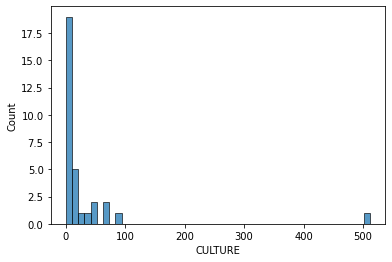

In [ ]:
sns.histplot(df['CULTURE'])

In [ ]:
df.isnull().sum()

words                                                              0
Buhe-Barildaan Buryat Traditional Wrestling with Cultural Codes    0
education wsu edu                                                  0
energy of chinggis khaan                                           0
history and status quo of the mongolian nadamu                     0
interview texts for analysis                                       0
local variesties of olympic wrestling                              0
martials arts of the world                                         0
mongolia - a political history                                     0
mongolia's naadam festival                                         0
research on horqin                                                 0
shamanic sports                                                    0
where going back is a step forward                                 0
wrestler princess                                                  0
wrestling magic                   

In [ ]:
df['theoi']

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    2
15    2
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
58    6
59    0
Name: theoi, dtype: int64